<a href="https://colab.research.google.com/github/pastelpargoal/NO2/blob/main/final_project_pargoal_kei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
# download necessary packages

# basics
import pandas as pd
import numpy as np

# geo
import geopandas as gpd
from shapely.geometry import Polygon

# plotnine
from plotnine import *
import plotnine

# Uploading Datasets

## Heat Pump Data

In [236]:
# Upload Heat Pump Data
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/WS%20Map_all.csv"
hp_df = pd.read_csv(url)
hp_df.head()


,Legal Town,Heat Pump Type,RNC,Sector,Source Program Name,Utility,Year,LEGAL TOWN,Program,Source Program,Project Measure: Measure Total Quantity
0,Enfield,"Air Source Heat Pump, Ducted",Not RNC,RES,RES HVAC,Eversource,2023,ENFIELD,Tracksys,Energy Optimization Rebate,1
1,Enfield,"Air Source Heat Pump, Ducted",Not RNC,RES,RES HVAC,Eversource,2023,ENFIELD,Tracksys,Energy Optimization Rebate,1
2,Enfield,"Air Source Heat Pump, Ducted",Not RNC,RES,RES HVAC,Eversource,2023,ENFIELD,Tracksys,Energy Optimization Rebate,1
3,Enfield,"Air Source Heat Pump, Ducted",Not RNC,RES,RES HVAC,Eversource,2023,ENFIELD,Tracksys,Energy Optimization Rebate,1
4,Enfield,"Air Source Heat Pump, Ducted",Not RNC,RES,RES HVAC,Eversource,2023,ENFIELD,Tracksys,Energy Optimization Rebate,1


In [237]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54814 entries, 0 to 54813
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Legal Town                               54814 non-null  object
 1   Heat Pump Type                           54814 non-null  object
 2   RNC                                      54814 non-null  object
 3   Sector                                   54814 non-null  object
 4   Source Program Name                      41362 non-null  object
 5   Utility                                  54814 non-null  object
 6   Year                                     54814 non-null  int64 
 7   LEGAL TOWN                               54814 non-null  object
 8   Program                                  54814 non-null  object
 9   Source Program                           41362 non-null  object
 10  Project Measure: Measure Total Quantity  54814 non-null  i

In [238]:
hp_df.shape

(54814, 11)

In [239]:
# Checking the frequency of heat pump types
hp_df['Heat Pump Type'].value_counts()

,count
Heat Pump Type,
"Air Source Heat Pump, Mini Split",40567
"Air Source Heat Pump, Ducted",13354
Ground Source Heat Pump,893


In [240]:
hp_df.describe()

,Year,Project Measure: Measure Total Quantity
count,54814.000000,54814.000000
mean,2021.310340,1.069453
std,1.751485,1.093436
min,2017.000000,-2.000000
25%,2020.000000,1.000000
50%,2022.000000,1.000000
75%,2023.000000,1.000000
max,2023.000000,132.000000


### Plotting Heat Pump Data

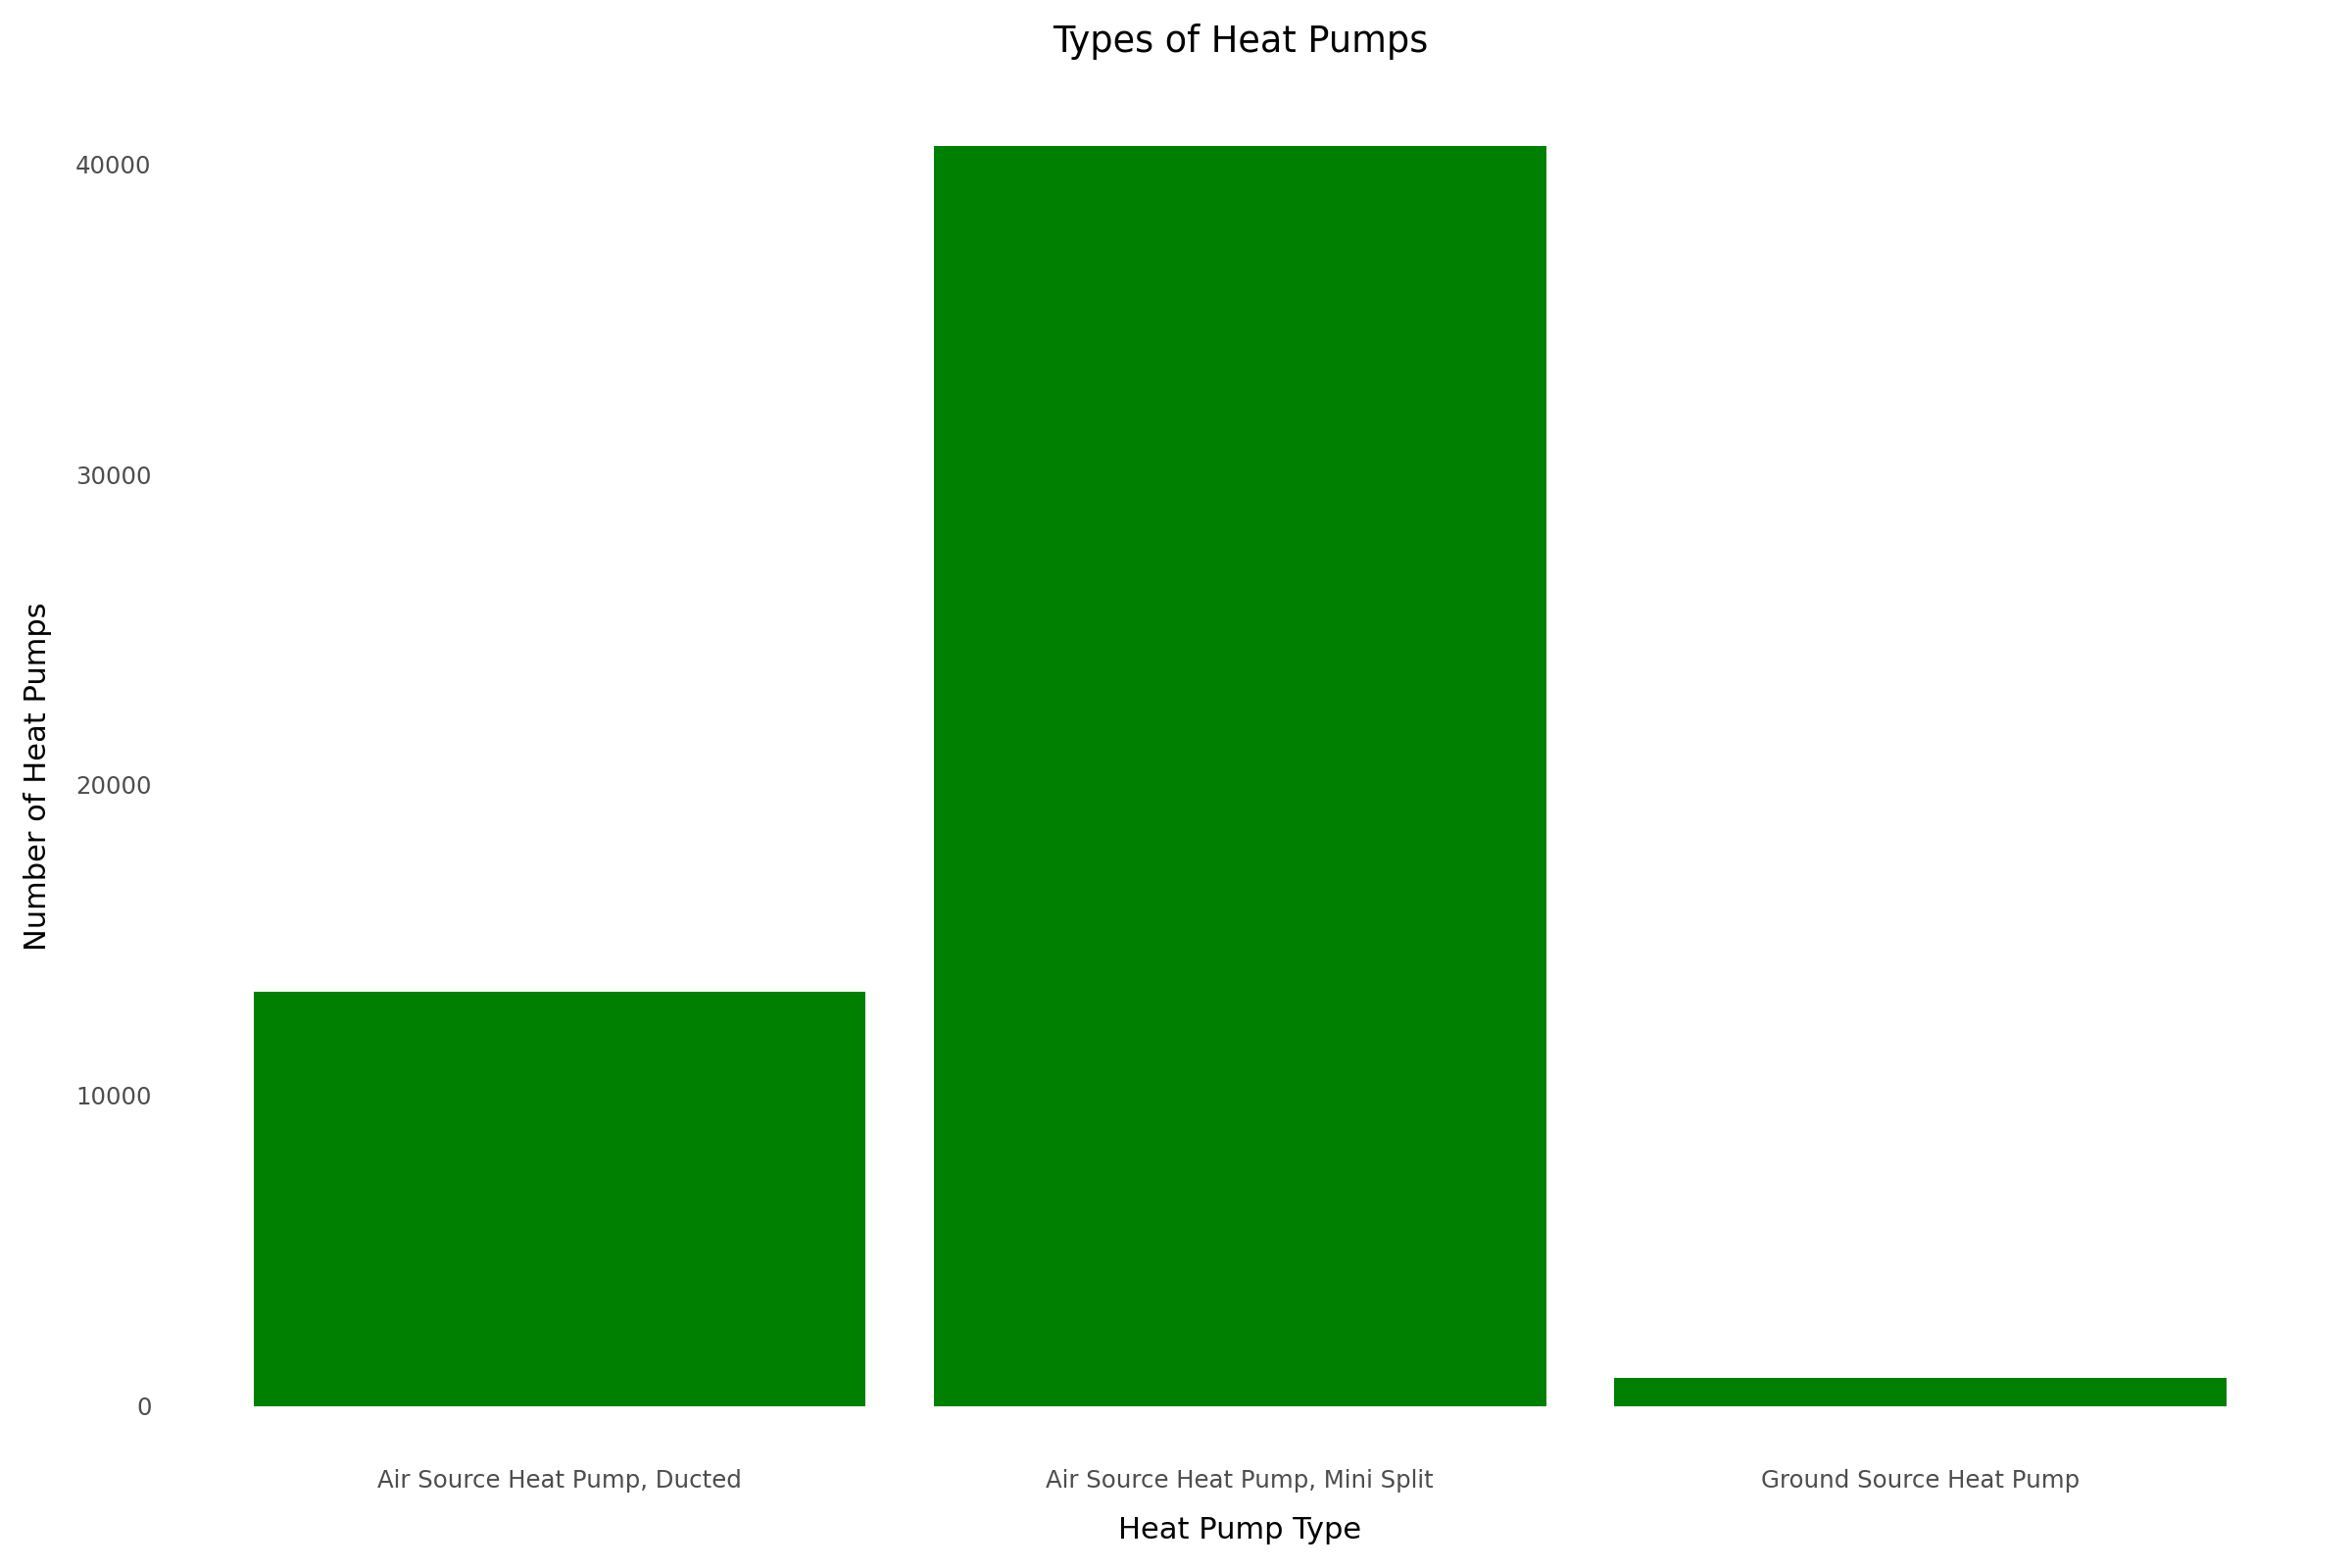

In [241]:
# Plotting by heat pump type - use in presentation
from plotnine import ggplot, aes, geom_bar, labs

plot = (
    ggplot(hp_df, aes(x='Heat Pump Type')) +
    geom_bar(fill="green") +   # <-- set the fill color directly here
    labs(title='Types of Heat Pumps', x='Heat Pump Type', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot


In [242]:
# See year distribution
hp_df.Year.value_counts()

,count
Year,
2023,18920
2022,11342
2021,9677
2020,5163
2019,4366
2018,3108
2017,2238


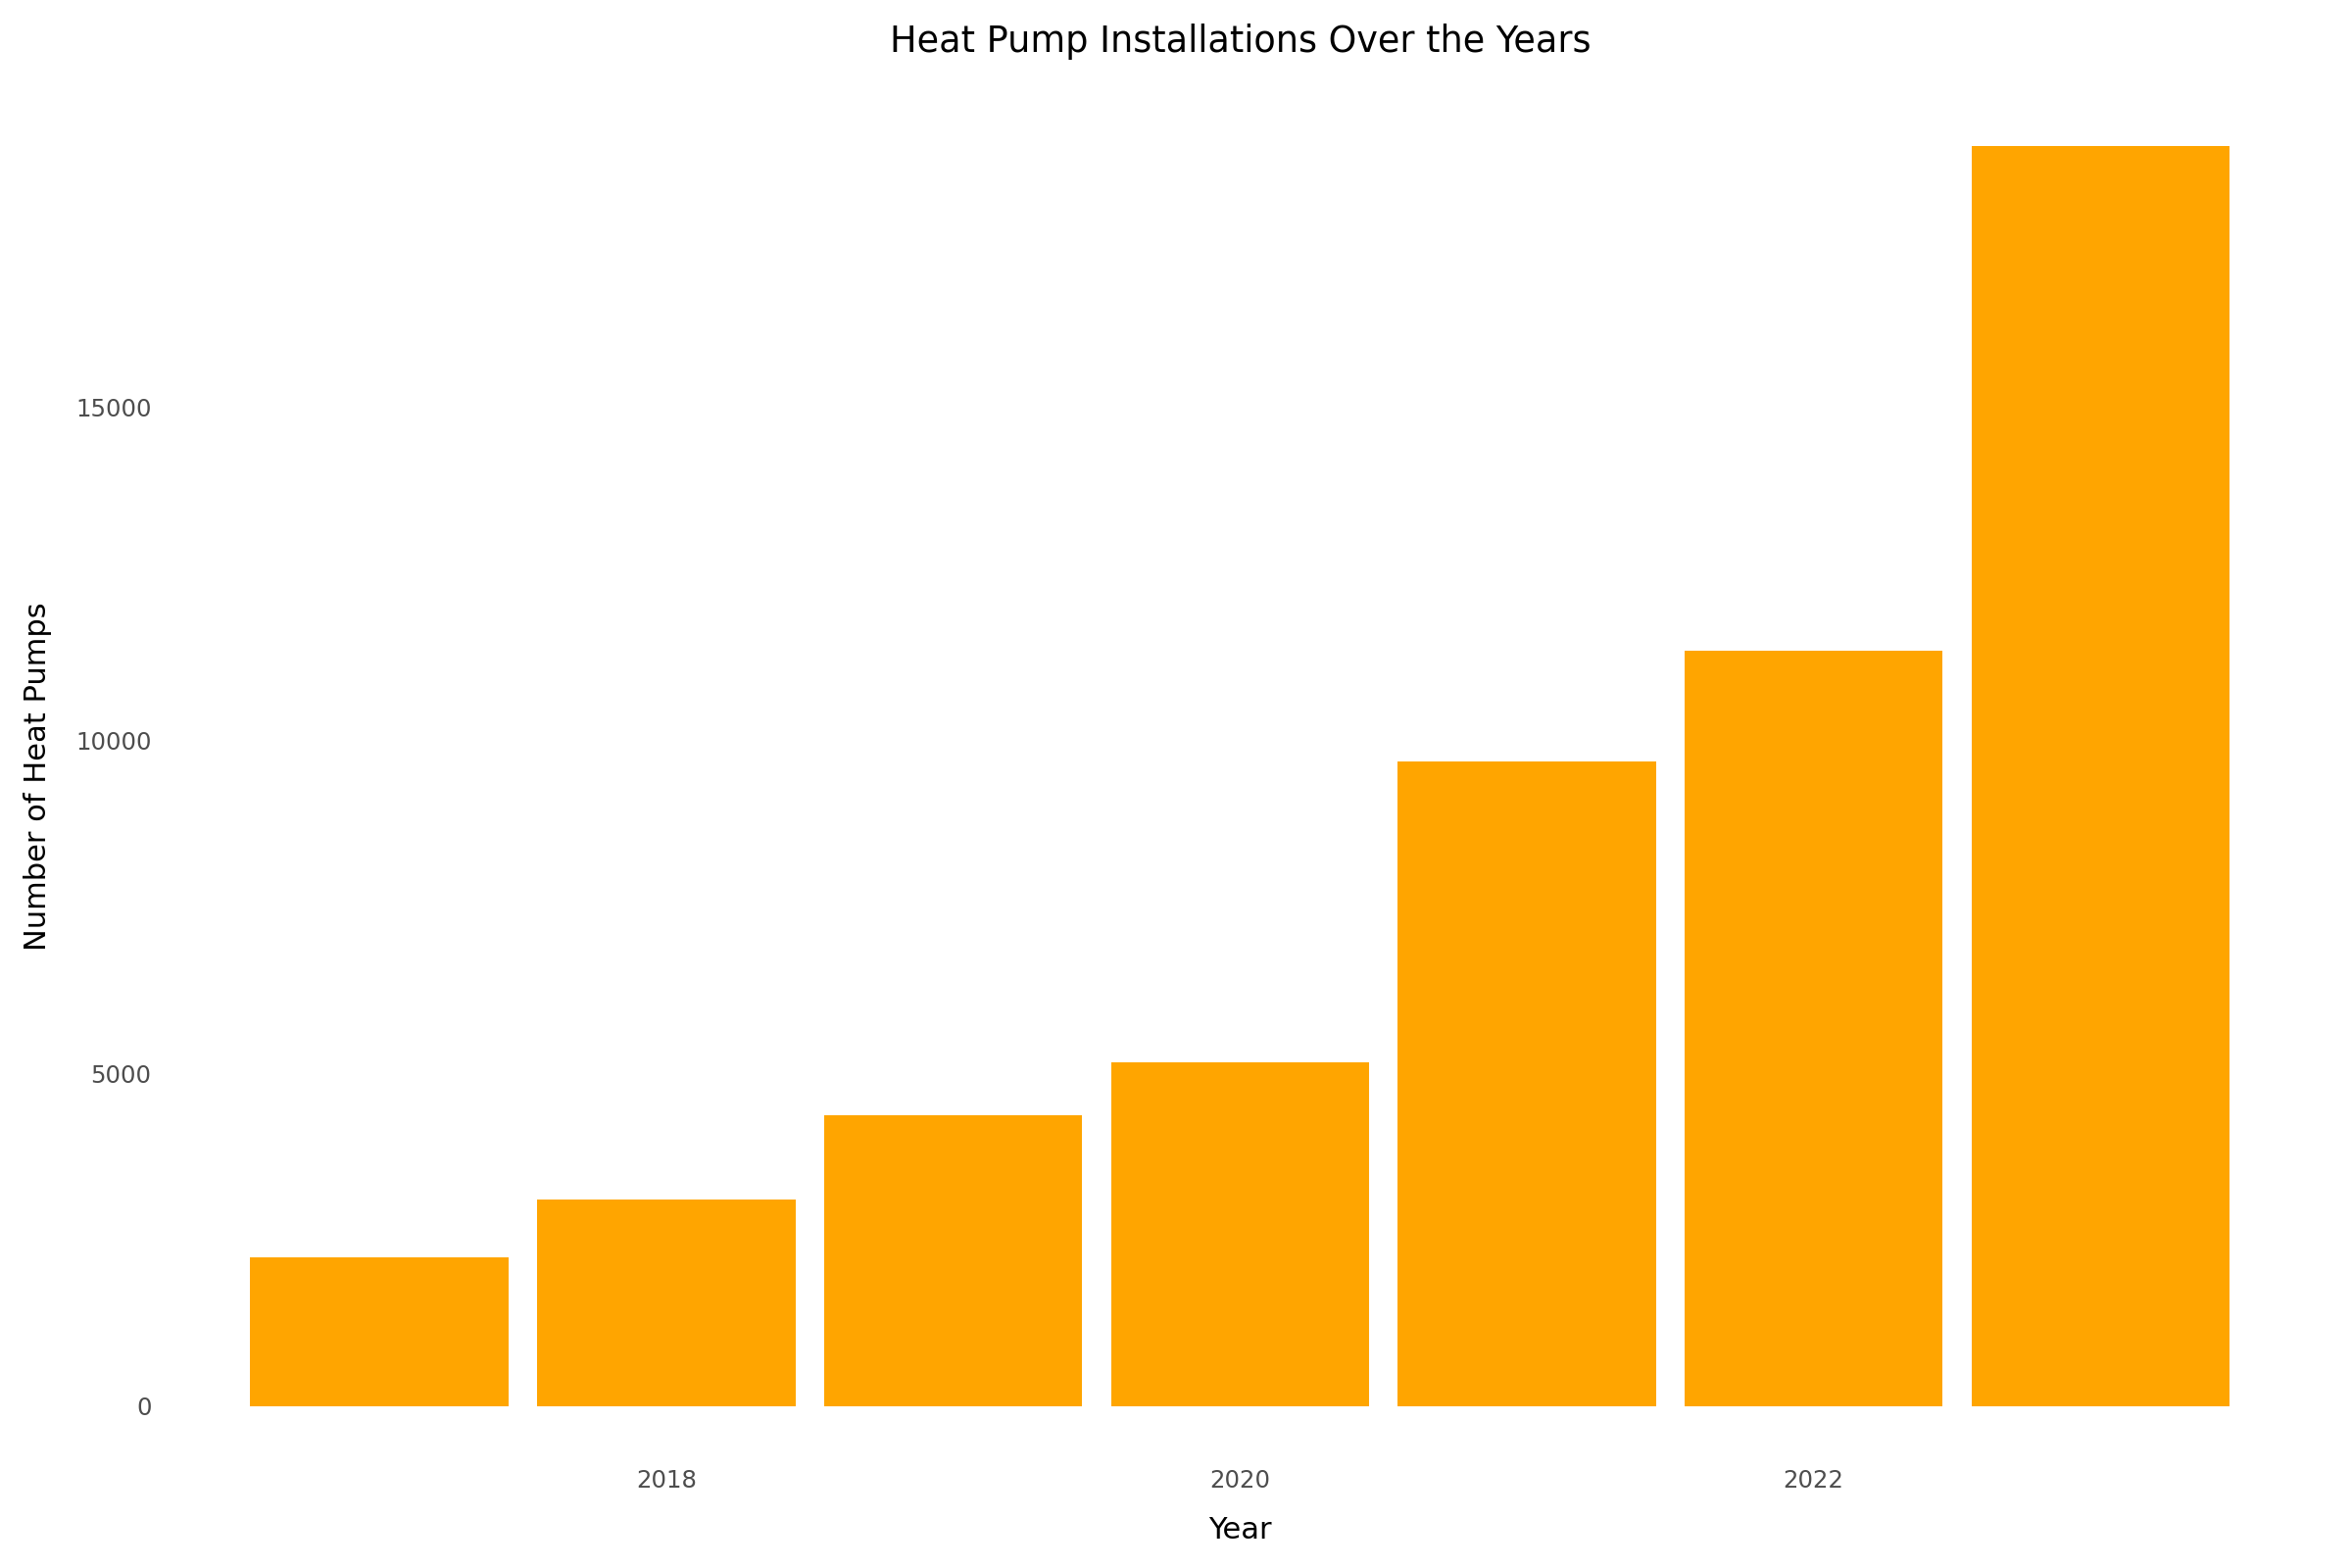

In [243]:
# Plotting by Years
plot = (
    ggplot(hp_df, aes(x='Year')) +
    geom_bar(fill="orange") +
    labs(title='Heat Pump Installations Over the Years', x='Year', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot

In [244]:
# See distribution for Utility companies
hp_df.Utility.value_counts()

,count
Utility,
Eversource,48378
UI,6436


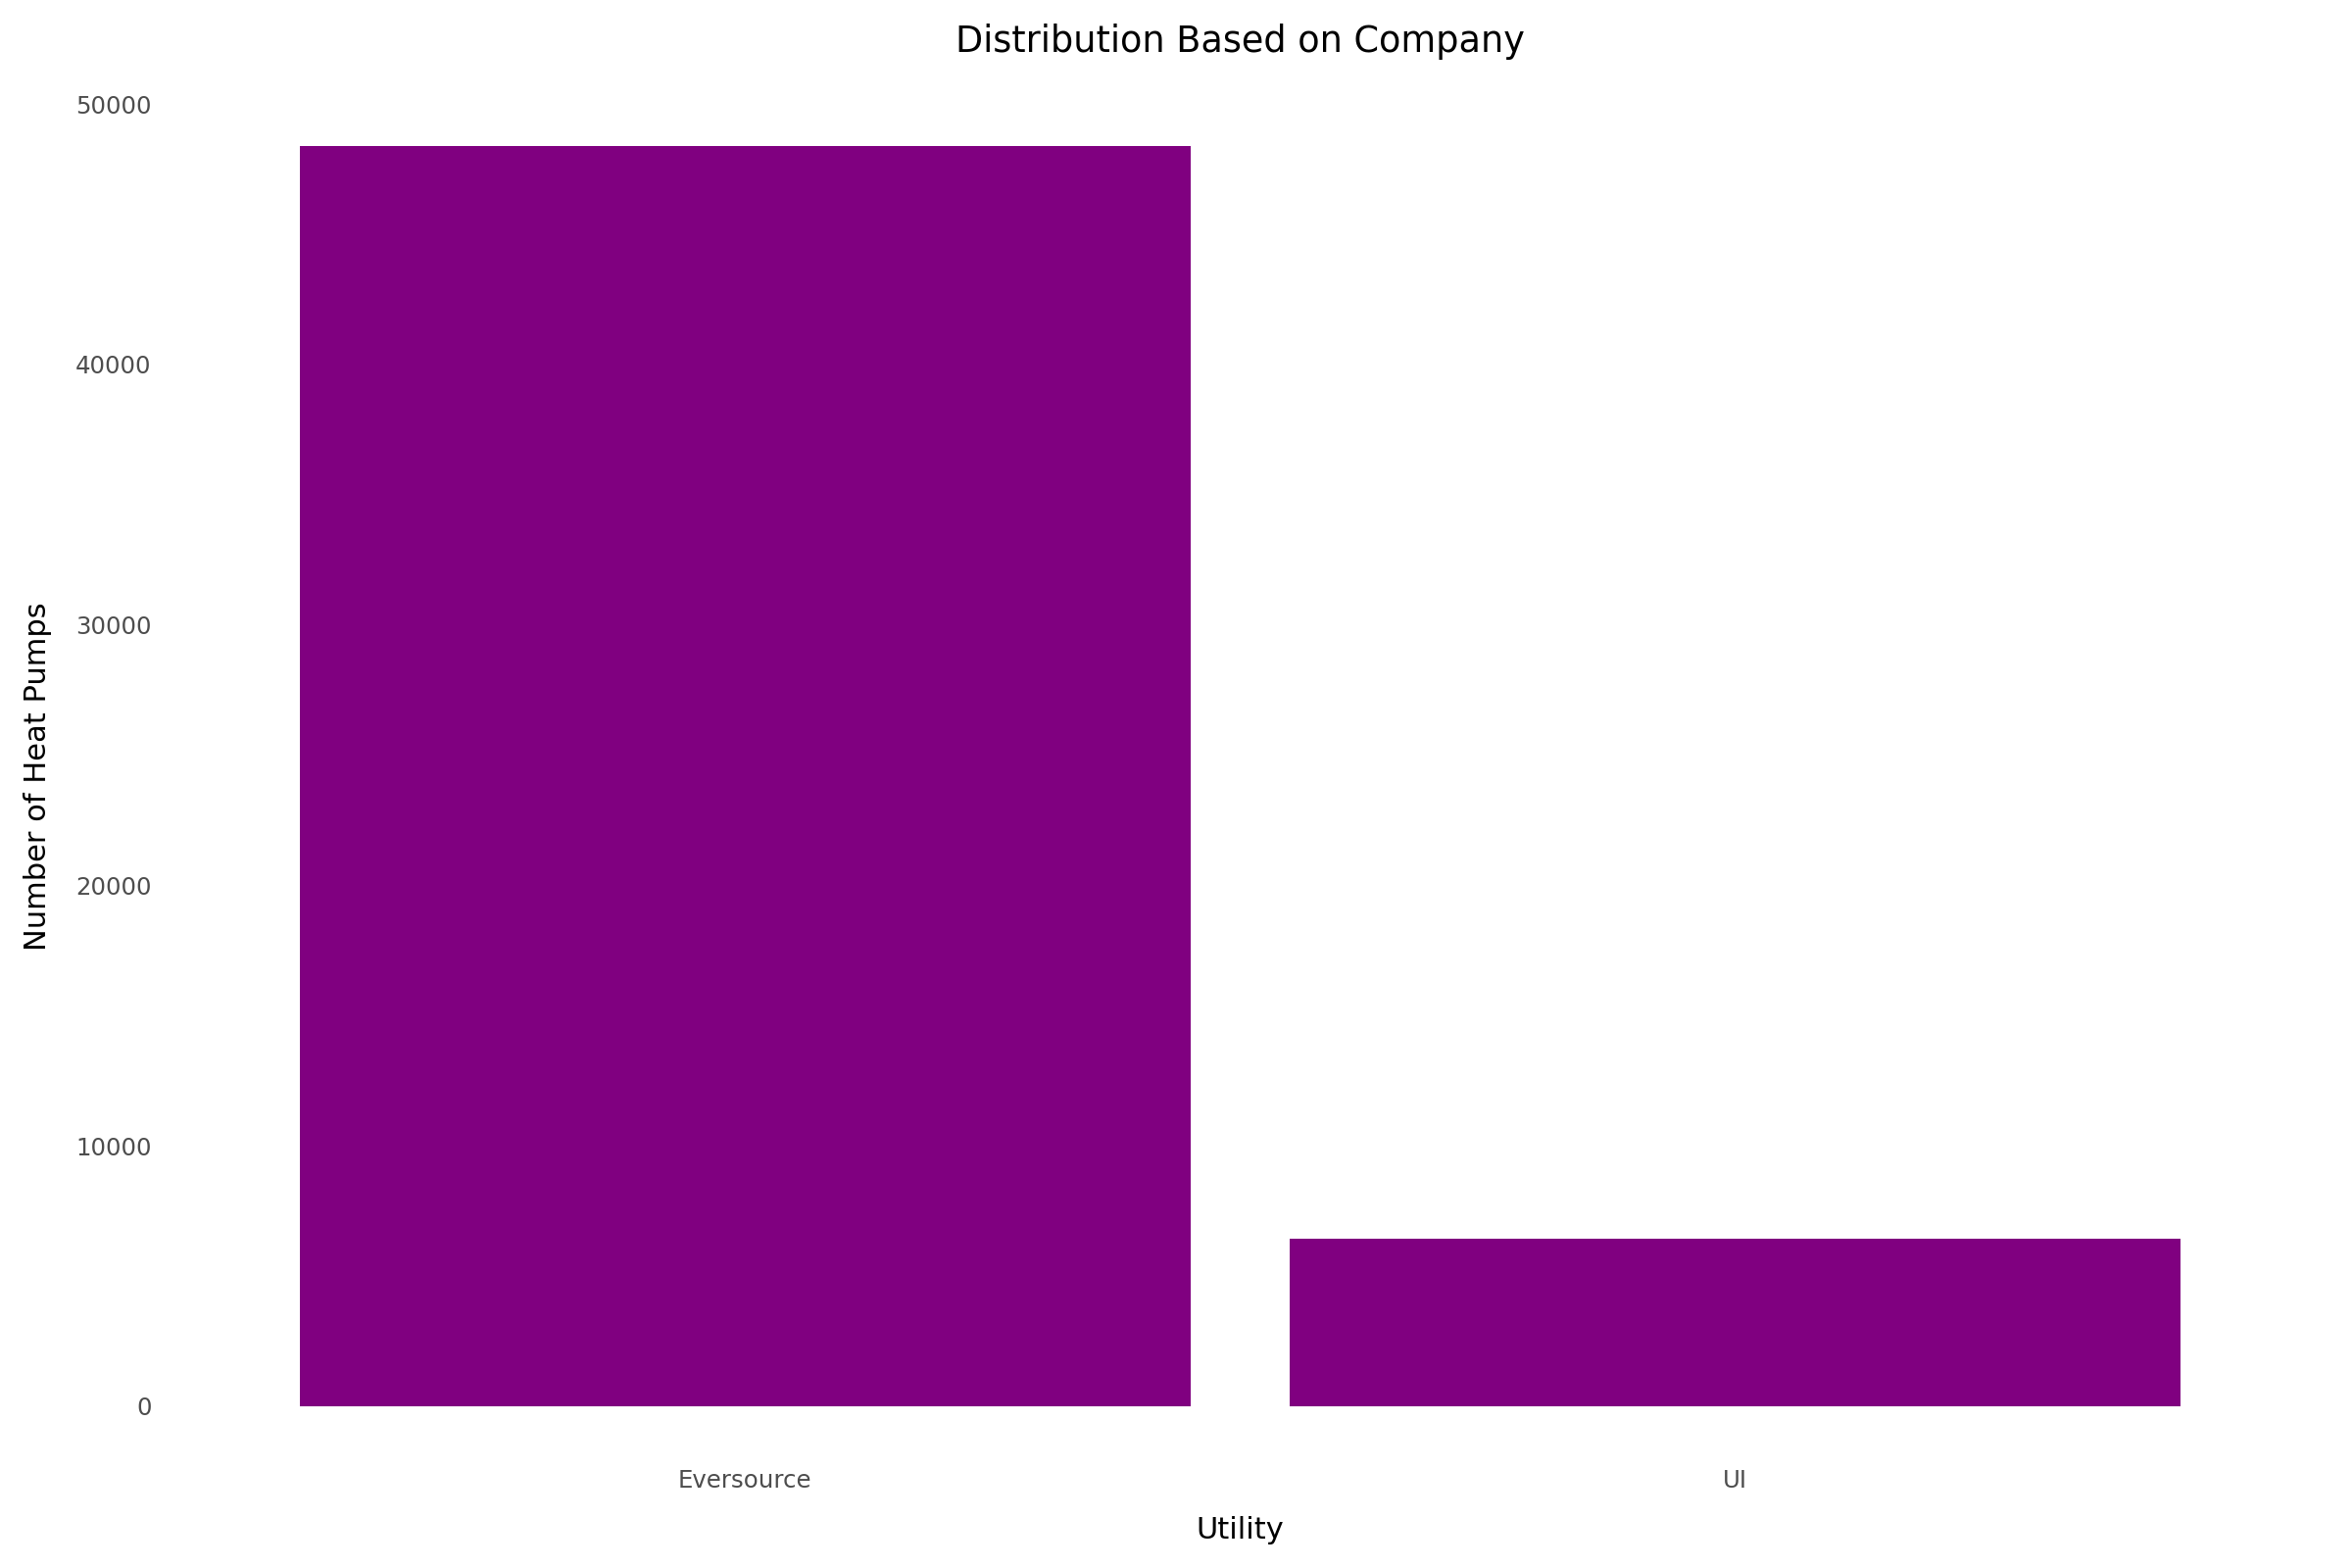

In [245]:
# Plotting by utility
plot = (
    ggplot(hp_df, aes(x='Utility')) +
    geom_bar(fill="purple") +
    labs(title='Distribution Based on Company', x='Utility', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot

### Data Cleaning

In [246]:
# Aggregating the years and heat pump type

# Group by 'Legal Town' and sum the 'Project Measure: Measure Total Quantity'
combined_hp = hp_df.groupby('Legal Town')['Project Measure: Measure Total Quantity'].sum().reset_index()

# Rename the column
combined_hp = combined_hp.rename(columns={'Project Measure: Measure Total Quantity': 'Total Heat Pumps'})
combined_hp = combined_hp.rename(columns={'Legal Town': 'TOWN'})


# View result
combined_hp.head()

,TOWN,Total Heat Pumps
0,Andover,95
1,Ansonia,115
2,Ashford,192
3,Avon,445
4,Barkhamsted,103


In [247]:
# check for NAs
combined_hp.isna().sum()

,0
TOWN,0
Total Heat Pumps,0


In [248]:
# number of Legal Towns
combined_hp['TOWN'].nunique()

166

# Demographic Data

In [249]:
# Uploading Demographic Data (2023)
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/CT_demoU.csv"
demo_df = pd.read_csv(url)
demo_df.head()

,TOWN,Median Age,Median Home Value,Unemployment Rate,Per Income Capita,Tenure_Owner_Occupied(%),Tenure_Renter_Occupied(%),Housing Units,TOWN_NO,COUNTY,...,60_to_64_Years,18_to_24_Years,65_and_Over_Years,Total_Households,Median_Household_Income,SNAP_Recipients,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.
0,Andover,47.9,297400,4.7,44803,88.40,11.60,1275.0,1.0,Tolland,...,9.6,9.5,17.7,1216.0,99449.0,2.88,1.4,7.9,5.1,74.6
1,Ansonia,42.4,217800,9.6,30285,59.42,40.58,8867.0,2.0,New Haven,...,8.4,6.5,18.4,7806.0,53709.0,15.60,48.6,1.5,7.9,40.6
2,Ashford,37.8,271700,4.9,46602,73.68,26.32,2033.0,3.0,Windham,...,7.4,7.0,14.2,1774.0,84909.0,8.23,1.1,2.7,16.6,62.6
3,Avon,45.2,371900,4.1,74617,83.27,16.73,8042.0,4.0,Hartford,...,7.6,5.0,20.9,6977.0,123077.0,2.85,43.1,4.5,8.8,42.5
4,Barkhamsted,48.3,262900,5.0,43558,92.66,7.34,1473.0,5.0,Litchfield,...,5.9,6.0,24.0,1336.0,103500.0,2.10,0.7,2.8,7.4,80.7


In [250]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   TOWN                                        170 non-null    object 
 1   Median Age                                  170 non-null    float64
 2   Median Home Value                           170 non-null    int64  
 3   Unemployment Rate                           170 non-null    float64
 4   Per Income Capita                           170 non-null    int64  
 5   Tenure_Owner_Occupied(%)                    170 non-null    float64
 6   Tenure_Renter_Occupied(%)                   170 non-null    float64
 7   Housing Units                               142 non-null    float64
 8   TOWN_NO                                     142 non-null    float64
 9   COUNTY                                      142 non-null    object 
 10  total_area    

In [251]:
demo_df.shape

(170, 38)

In [252]:
demo_df.describe()

,Median Age,Median Home Value,Unemployment Rate,Per Income Capita,Tenure_Owner_Occupied(%),Tenure_Renter_Occupied(%),Housing Units,TOWN_NO,total_area,Asian,...,60_to_64_Years,18_to_24_Years,65_and_Over_Years,Total_Households,Median_Household_Income,SNAP_Recipients,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.
count,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,44.979412,3.279212e+05,5.500000,49862.829412,77.359882,22.640118,8676.253521,84.753521,0.008481,3.226056,...,8.131690,8.216197,19.752113,7792.640845,97559.049296,6.920915,14.623239,4.036620,11.707746,64.003521
std,5.562564,1.892818e+05,1.338329,17372.617376,13.821183,13.821183,10868.781892,50.483223,0.003469,2.928357,...,1.992481,5.395607,4.351583,9407.118769,32236.607361,6.116763,17.392607,2.601758,6.418436,15.505416
min,21.100000,1.327000e+05,3.700000,21071.000000,23.980000,2.940000,436.000000,1.000000,0.001511,0.000000,...,3.200000,2.300000,10.500000,374.000000,36154.000000,0.000000,0.000000,0.600000,2.000000,21.100000
25%,42.325000,2.292250e+05,4.700000,39020.500000,71.555000,13.137500,2039.750000,38.250000,0.005674,1.200000,...,7.000000,6.100000,16.900000,1823.250000,78708.750000,2.857500,1.200000,2.200000,7.425000,53.650000
50%,45.350000,2.879500e+05,5.100000,47452.000000,81.025000,18.975000,5135.500000,80.500000,0.008222,2.350000,...,7.700000,7.200000,18.950000,4700.500000,92122.000000,5.530000,5.900000,3.350000,10.400000,68.800000
75%,48.200000,3.478250e+05,6.000000,55367.250000,86.862500,28.445000,9814.250000,129.750000,0.010867,4.300000,...,8.900000,8.700000,22.175000,8932.500000,108858.000000,8.395000,24.475000,5.175000,15.050000,75.550000
max,57.800000,1.465800e+06,11.000000,129829.000000,97.060000,76.020000,60335.000000,169.000000,0.017359,15.400000,...,16.900000,57.500000,33.700000,50638.000000,243750.000000,38.750000,60.300000,14.100000,38.600000,86.700000


### Data Cleaning

In [253]:
# subset to just Town, Median Home Value, and Tenure_Owner_Occupied(%)
demo_df = demo_df[['TOWN', 'Median_Household_Income', 'Tenure_Owner_Occupied(%)']]
demo_df.head()

,TOWN,Median_Household_Income,Tenure_Owner_Occupied(%)
0,Andover,99449.0,88.40
1,Ansonia,53709.0,59.42
2,Ashford,84909.0,73.68
3,Avon,123077.0,83.27
4,Barkhamsted,103500.0,92.66


In [254]:
# how many towns in demo_df
demo_df['TOWN'].nunique()

170

In [255]:
# check for NAs
demo_df.isna().sum()

,0
TOWN,0
Median_Household_Income,28
Tenure_Owner_Occupied(%),0


In [256]:
# remove NAs
# We decided to remove the NA values - CT has 169 towns, but the demographic dataset is missing the Median Household Income for 28 towns. Thus, we decided to remove those 28 towns. That leaves us with 142 towns left for the analysis. Later, 3 towns are removed because they don't have heat pump data.
demo_df = demo_df.dropna()

In [257]:
demo_df.isna().shape
# 142 towns left

(142, 3)

# Joining both Demographic Data and Heat Pump Data

In [258]:
# Merging both datasets
joined_df = pd.merge(combined_hp, demo_df, on='TOWN', how='right')
joined_df.head()

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%)
0,Andover,95.0,99449.0,88.40
1,Ansonia,115.0,53709.0,59.42
2,Ashford,192.0,84909.0,73.68
3,Avon,445.0,123077.0,83.27
4,Barkhamsted,103.0,103500.0,92.66


In [259]:
joined_df.shape

(142, 4)

In [260]:
# remove all NAs
joined_df = joined_df.dropna()

In [261]:
joined_df.shape
# end up with 139 towns left that have both income and owners

(139, 4)

In [262]:
# create new column for above or below national average of home ownership
# we chose 66%, since that is the national average of home ownership in the USA
# Income and home ownership are indicators of wealth

joined_df['Above_National_Average'] = joined_df['Tenure_Owner_Occupied(%)'] > 66
joined_df.head()

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%),Above_National_Average
0,Andover,95.0,99449.0,88.40,True
1,Ansonia,115.0,53709.0,59.42,False
2,Ashford,192.0,84909.0,73.68,True
3,Avon,445.0,123077.0,83.27,True
4,Barkhamsted,103.0,103500.0,92.66,True


# First Analysis (Household Income vs Heat Pump)

## Household Income

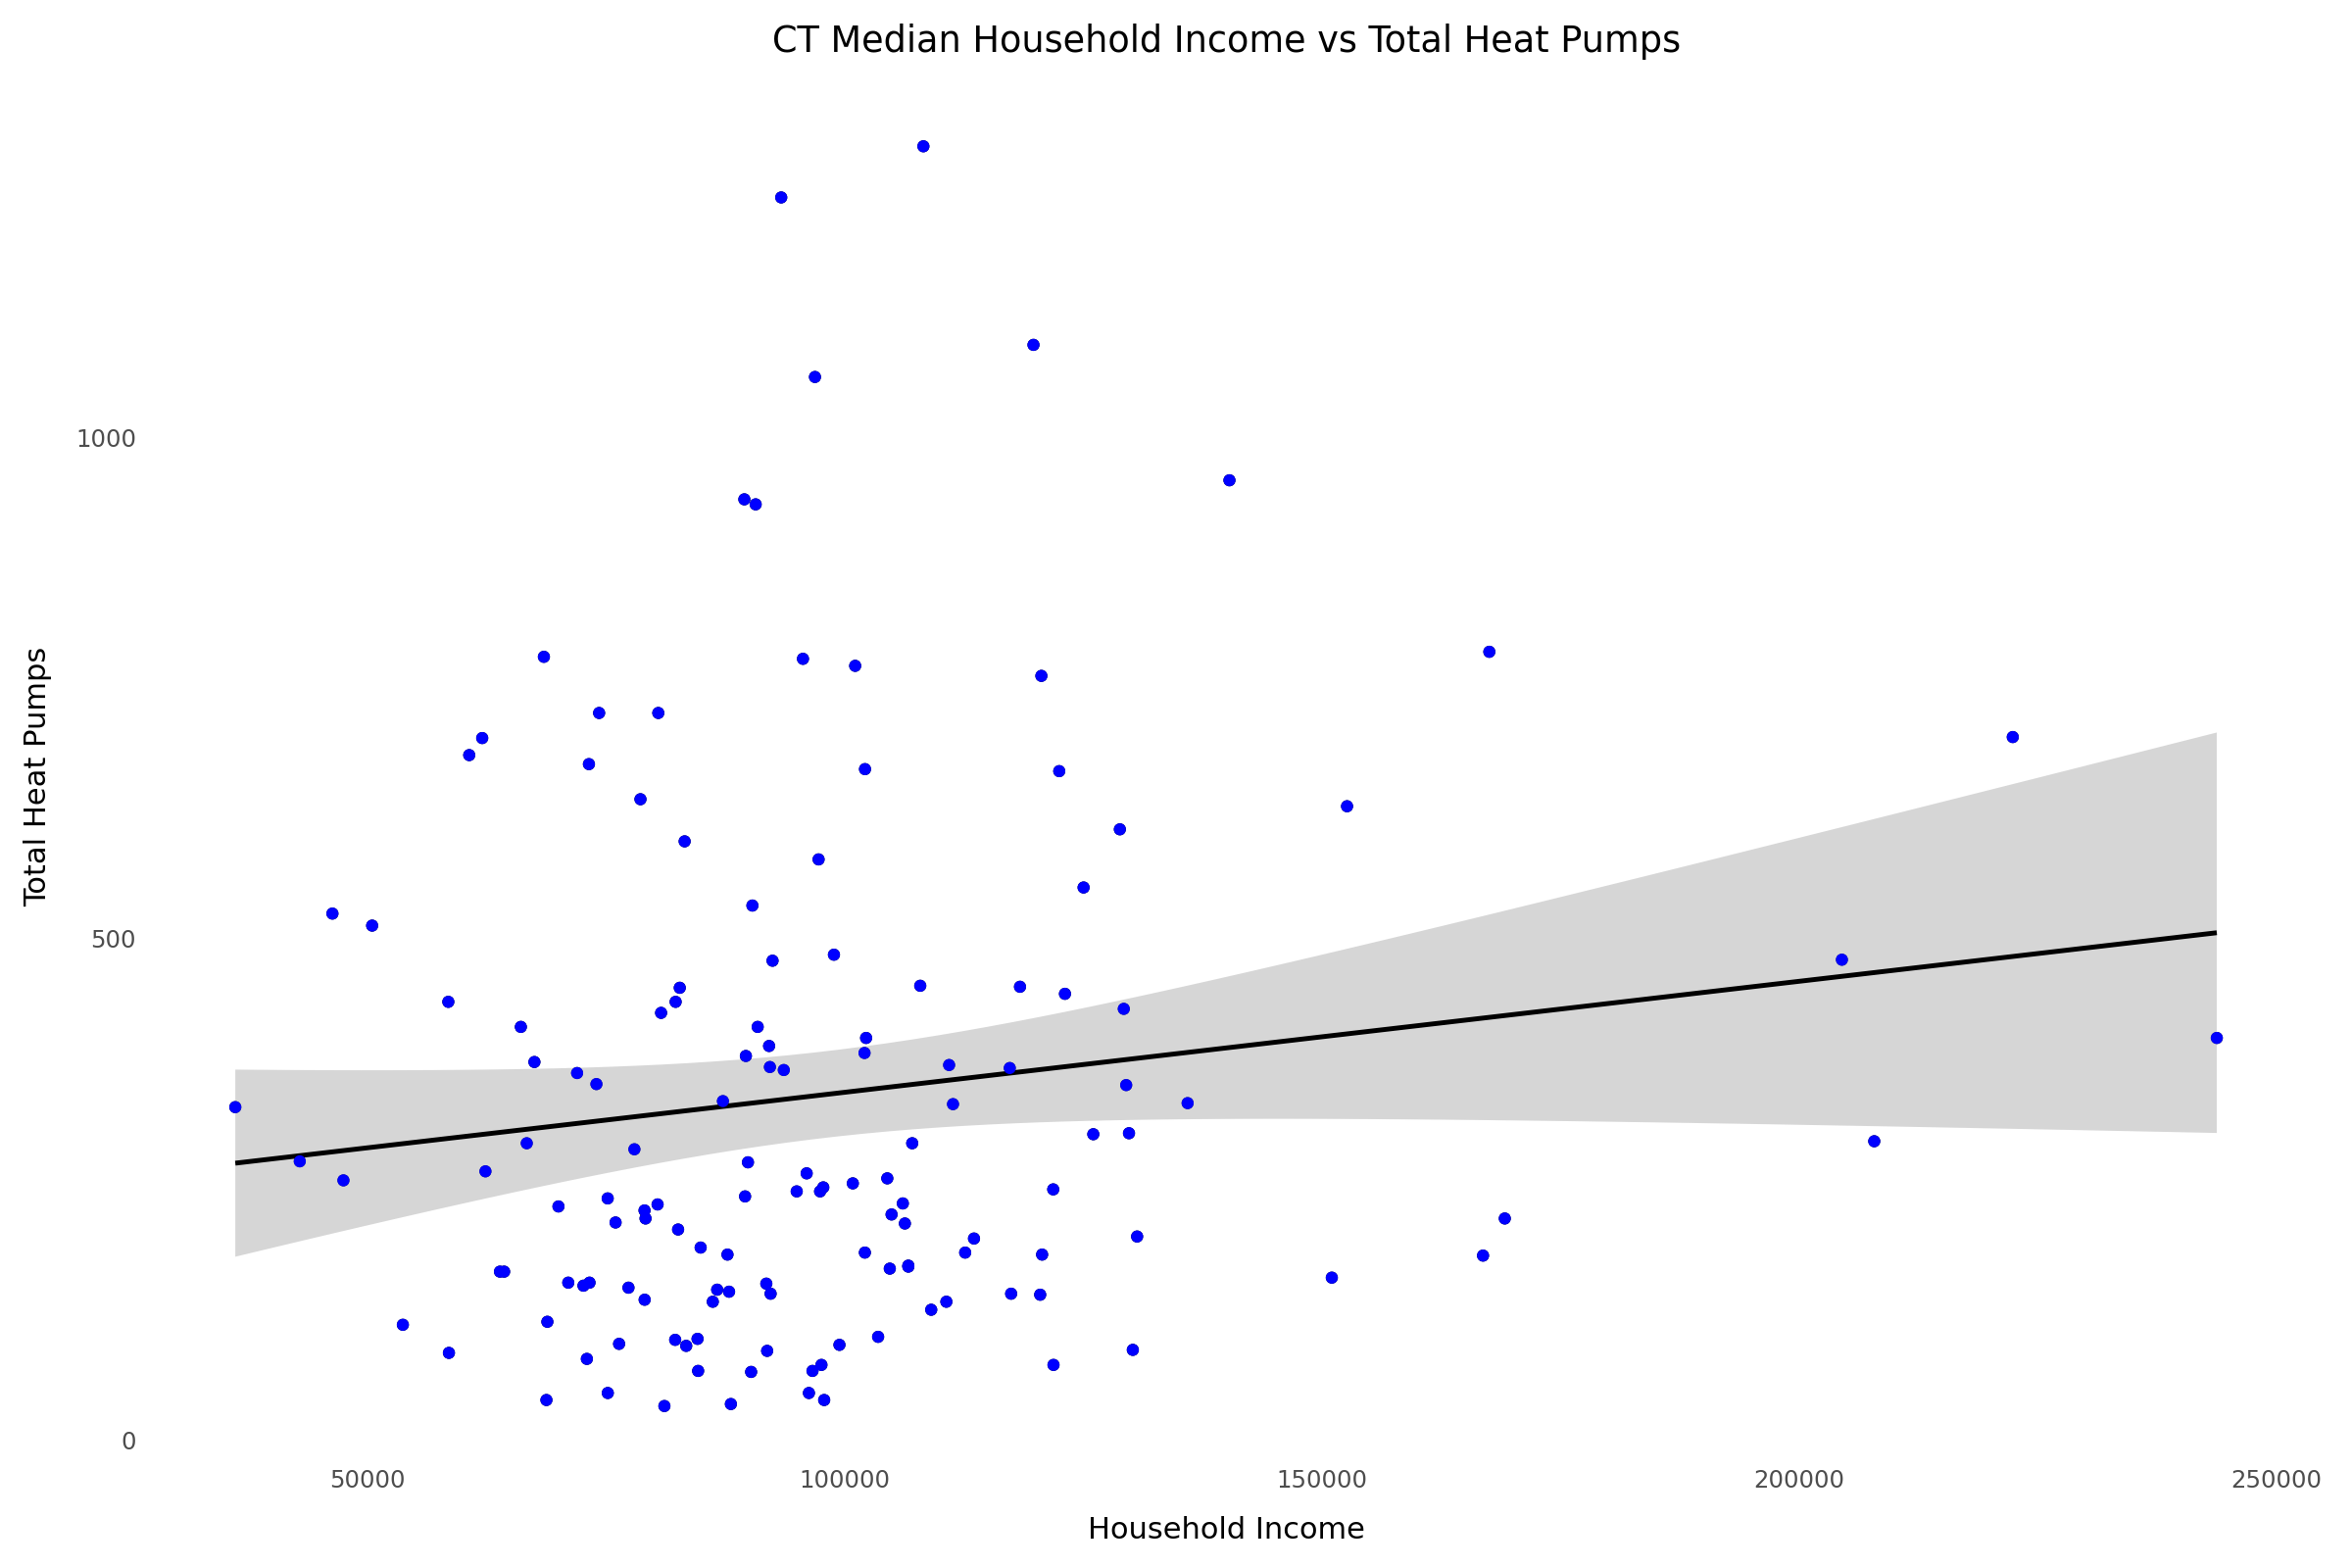

In [263]:
# create plot comparing household income and total heat pumps
(
    ggplot(joined_df, aes(x='Median_Household_Income', y='Total Heat Pumps')) +
    geom_point() +
    geom_smooth(method='lm') +
    theme_minimal() +
    geom_point(color="blue") +
    labs(title='CT Median Household Income vs Total Heat Pumps', x='Household Income', y='Total Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)

In [264]:
# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(joined_df['Median_Household_Income'], joined_df['Total Heat Pumps'])
print(correlation_matrix)

[[1.         0.13846119]
 [0.13846119 1.        ]]


In [265]:
# do linear regression test to see correlation
import statsmodels.api as sm

# define model
model = sm.OLS(joined_df['Total Heat Pumps'], joined_df['Median_Household_Income'])

# fit model
results = model.fit()

# print results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Total Heat Pumps   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              223.7
Date:                Sun, 27 Apr 2025   Prob (F-statistic):                    1.14e-30
Time:                        02:46:28   Log-Likelihood:                         -973.25
No. Observations:                 139   AIC:                                      1948.
Df Residuals:                     138   BIC:                                      1951.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [266]:
# Key Takeaway: Statistically Significant at the 0.05 level, though the correlation is weak.

# Second Analysis

## T-test

In [267]:
# Second analysis - T-test Seeing by
import scipy.stats as stats
stats.ttest_ind(joined_df['Total Heat Pumps'][joined_df['Above_National_Average'] == True],
                joined_df['Total Heat Pumps'][joined_df['Above_National_Average'] == False])

TtestResult(statistic=np.float64(-1.9130508408116251), pvalue=np.float64(0.05782804761765743), df=np.float64(137.0))

In [268]:
t_statistic, p_value = stats.ttest_ind(joined_df['Total Heat Pumps'][joined_df['Above_National_Average'] == True],
                joined_df['Total Heat Pumps'][joined_df['Above_National_Average'] == False])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.9130508408116251
P-value: 0.05782804761765743


In [269]:
# not statistically significant (t.test - home ownership by national average rate VS heat pump)

## Linear Regression

In [270]:
# define model
model = sm.OLS(joined_df['Total Heat Pumps'], joined_df['Tenure_Owner_Occupied(%)'])

# fit model
results = model.fit()

# print results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Total Heat Pumps   R-squared (uncentered):                   0.588
Model:                            OLS   Adj. R-squared (uncentered):              0.585
Method:                 Least Squares   F-statistic:                              197.0
Date:                Sun, 27 Apr 2025   Prob (F-statistic):                    2.34e-28
Time:                        02:46:28   Log-Likelihood:                         -978.58
No. Observations:                 139   AIC:                                      1959.
Df Residuals:                     138   BIC:                                      1962.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [271]:
# is statistically significant (0.05 level) when doing a linear regression, not aggregating based on national average

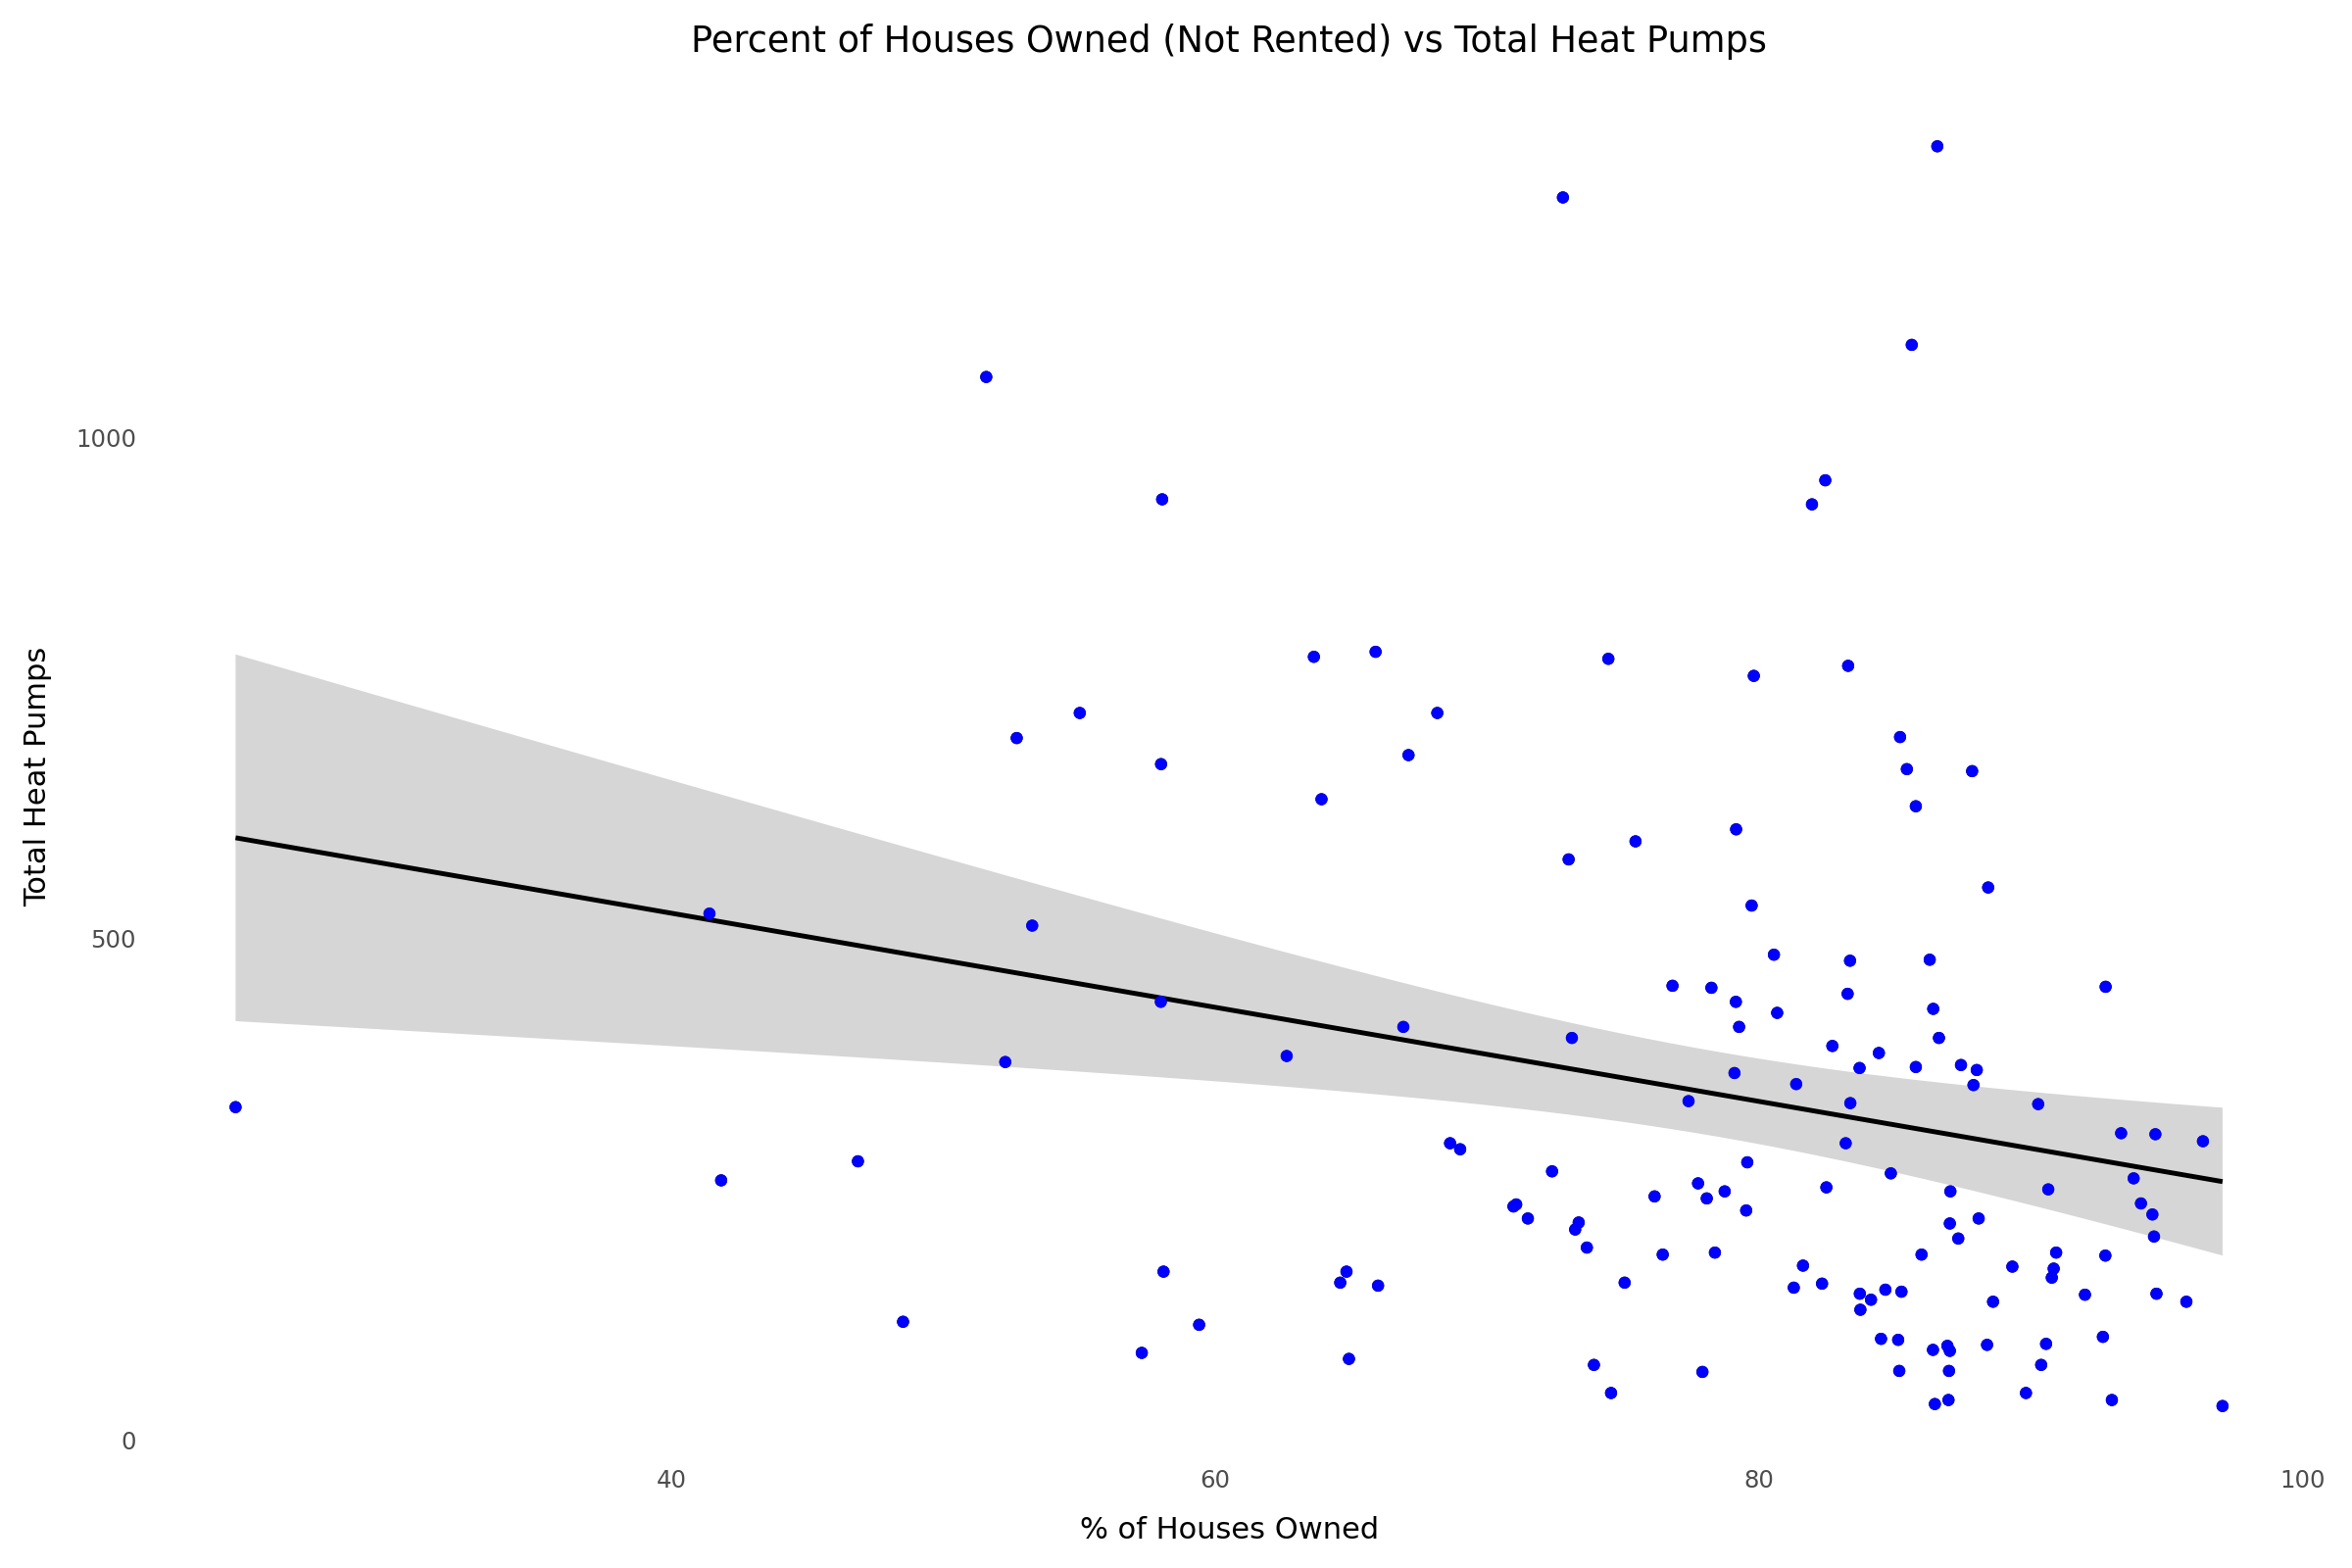

In [272]:
# create plot comparing household income and total heat pumps
(
    ggplot(joined_df, aes(x='Tenure_Owner_Occupied(%)', y='Total Heat Pumps')) +
    geom_point() +
    geom_smooth(method='lm') +
    theme_minimal() +
    geom_point(color="blue") +
    labs(title='Percent of Houses Owned (Not Rented) vs Total Heat Pumps', x='% of Houses Owned', y='Total Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)

# Spatial Analysis

## Uploading Spatial Data - CT Shapefile

In [273]:
# download CT shapefiles
!wget -O Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/main/Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip"

--2025-04-27 02:46:33--  https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/main/Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3301614 (3.1M) [application/zip]
Saving to: ‘Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip’

Connecticut_and_Vic 100%[===================>]   3.15M  --.-KB/s    in 0.05s   

2025-04-27 02:46:33 (60.6 MB/s) - ‘Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip’ saved [3301614/3301614]



In [274]:
# unzip
!unzip Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip

Archive:  Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip
replace CT_Vicinity_Town_Polygon.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CT_Vicinity_Town_Polygon.cpg  
  inflating: CT_Vicinity_Town_Polygon.dbf  
  inflating: CT_Vicinity_Town_Polygon.prj  
  inflating: CT_Vicinity_Town_Polygon.shp  
  inflating: CT_Vicinity_Town_Polygon.shx  


In [275]:
shape = 'CT_Vicinity_Town_Polygon.shp'
df_CT = gpd.read_file(shape)
df_CT.head()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: CT_Vicinity_Town_Polygon.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.


,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,TOWN_NAME,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
0,Land,Other States,MA,Massachusetts,FIPS-COUNTY,27.0,Worcester,TOWN-ID,Uxbridge,True,Uxbridge,None,Uxbridge,"POLYGON ((1314474.251 950430.875, 1314007.251 ..."
1,Land,Other States,MA,Massachusetts,FIPS-COUNTY,21.0,Norfolk,TOWN-ID,Foxborough,True,Foxborough,None,Foxborough,"POLYGON ((1426805.375 949926.625, 1421795.625 ..."
2,Land,Other States,MA,Massachusetts,FIPS-COUNTY,27.0,Worcester,TOWN-ID,Southbridge,True,Southbridge,None,Southbridge,"POLYGON ((1205552.751 952445.875, 1205636.501 ..."
3,Land,Other States,MA,Massachusetts,FIPS-COUNTY,5.0,Bristol,TOWN-ID,Easton,True,Easton,None,Easton,"POLYGON ((1437395.589 928737.738, 1437395.589 ..."
4,Land,Other States,MA,Massachusetts,FIPS-COUNTY,13.0,Hamden,TOWN-ID,Agawam,True,Agawam,None,Agawam,"POLYGON ((1043830.001 959124.501, 1043763.375 ..."


In [277]:
df_CT.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LAND_CLASS  1780 non-null   object  
 1   CT_LEGEND   1780 non-null   object  
 2   STATE_COD   1779 non-null   object  
 3   STATE_NAME  1779 non-null   object  
 4   CNTY_FIELD  1774 non-null   object  
 5   CNTY_COD    1780 non-null   float64 
 6   CNTY_NAME   1770 non-null   object  
 7   TOWN_FIELD  1774 non-null   object  
 8   TOWN_NAME   1770 non-null   object  
 9   LABEL_FLAG  1780 non-null   object  
 10  MAP_LABEL   655 non-null    object  
 11  CT_LABEL_Y  169 non-null    object  
 12  CT_LABEL_N  486 non-null    object  
 13  geometry    1780 non-null   geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 194.8+ KB


In [278]:
df_CT.shape

(1780, 14)

## Data Cleaning

In [279]:
# subset to just CT
CONN = df_CT[df_CT.CT_LEGEND == "Connecticut"]
CONN.head()

,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,TOWN_NAME,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
22,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Salisbury,True,Salisbury,Salisbury,None,"POLYGON ((839572.437 943276.875, 838568.251 94..."
25,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,North Canaan,True,North Canaan,North Canaan,None,"POLYGON ((851614.937 942698.187, 849750.437 94..."
26,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Norfolk,True,Norfolk,Norfolk,None,"POLYGON ((885330.625 941199.187, 881530.687 94..."
27,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Colebrook,True,Colebrook,Colebrook,None,"POLYGON ((917666.875 939747.251, 916177.375 93..."
28,Land,Connecticut,CT,Connecticut,CNTY_COD,2.0,Hartford,TOWN_NO,Hartland,True,Hartland,Hartland,None,"POLYGON ((937783.125 939127.187, 937564.251 93..."


In [280]:
# check if subsetted correctly to just CT
CONN.CT_LEGEND.value_counts()

,count
CT_LEGEND,
Connecticut,783


In [281]:
# Changing the name of the column
CONN = CONN.rename(columns={'TOWN_NAME': 'TOWN'})
CONN.head()

,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,TOWN,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
22,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Salisbury,True,Salisbury,Salisbury,None,"POLYGON ((839572.437 943276.875, 838568.251 94..."
25,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,North Canaan,True,North Canaan,North Canaan,None,"POLYGON ((851614.937 942698.187, 849750.437 94..."
26,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Norfolk,True,Norfolk,Norfolk,None,"POLYGON ((885330.625 941199.187, 881530.687 94..."
27,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Colebrook,True,Colebrook,Colebrook,None,"POLYGON ((917666.875 939747.251, 916177.375 93..."
28,Land,Connecticut,CT,Connecticut,CNTY_COD,2.0,Hartford,TOWN_NO,Hartland,True,Hartland,Hartland,None,"POLYGON ((937783.125 939127.187, 937564.251 93..."


In [286]:
CONN.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 783 entries, 22 to 1765
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LAND_CLASS  783 non-null    object  
 1   CT_LEGEND   783 non-null    object  
 2   STATE_COD   783 non-null    object  
 3   STATE_NAME  783 non-null    object  
 4   CNTY_FIELD  783 non-null    object  
 5   CNTY_COD    783 non-null    float64 
 6   CNTY_NAME   783 non-null    object  
 7   TOWN_FIELD  783 non-null    object  
 8   TOWN        783 non-null    object  
 9   LABEL_FLAG  783 non-null    object  
 10  MAP_LABEL   169 non-null    object  
 11  CT_LABEL_Y  169 non-null    object  
 12  CT_LABEL_N  0 non-null      object  
 13  geometry    783 non-null    geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 107.9+ KB


In [287]:
CONN.describe()

,CNTY_COD
count,783.000000
mean,3.639847
std,2.140355
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,8.000000


In [288]:
CONN.shape

(783, 14)

In [289]:
# Merge CONN with joined_df
df = pd.merge(joined_df, CONN, on='TOWN', how='left')
#df

## Plotting

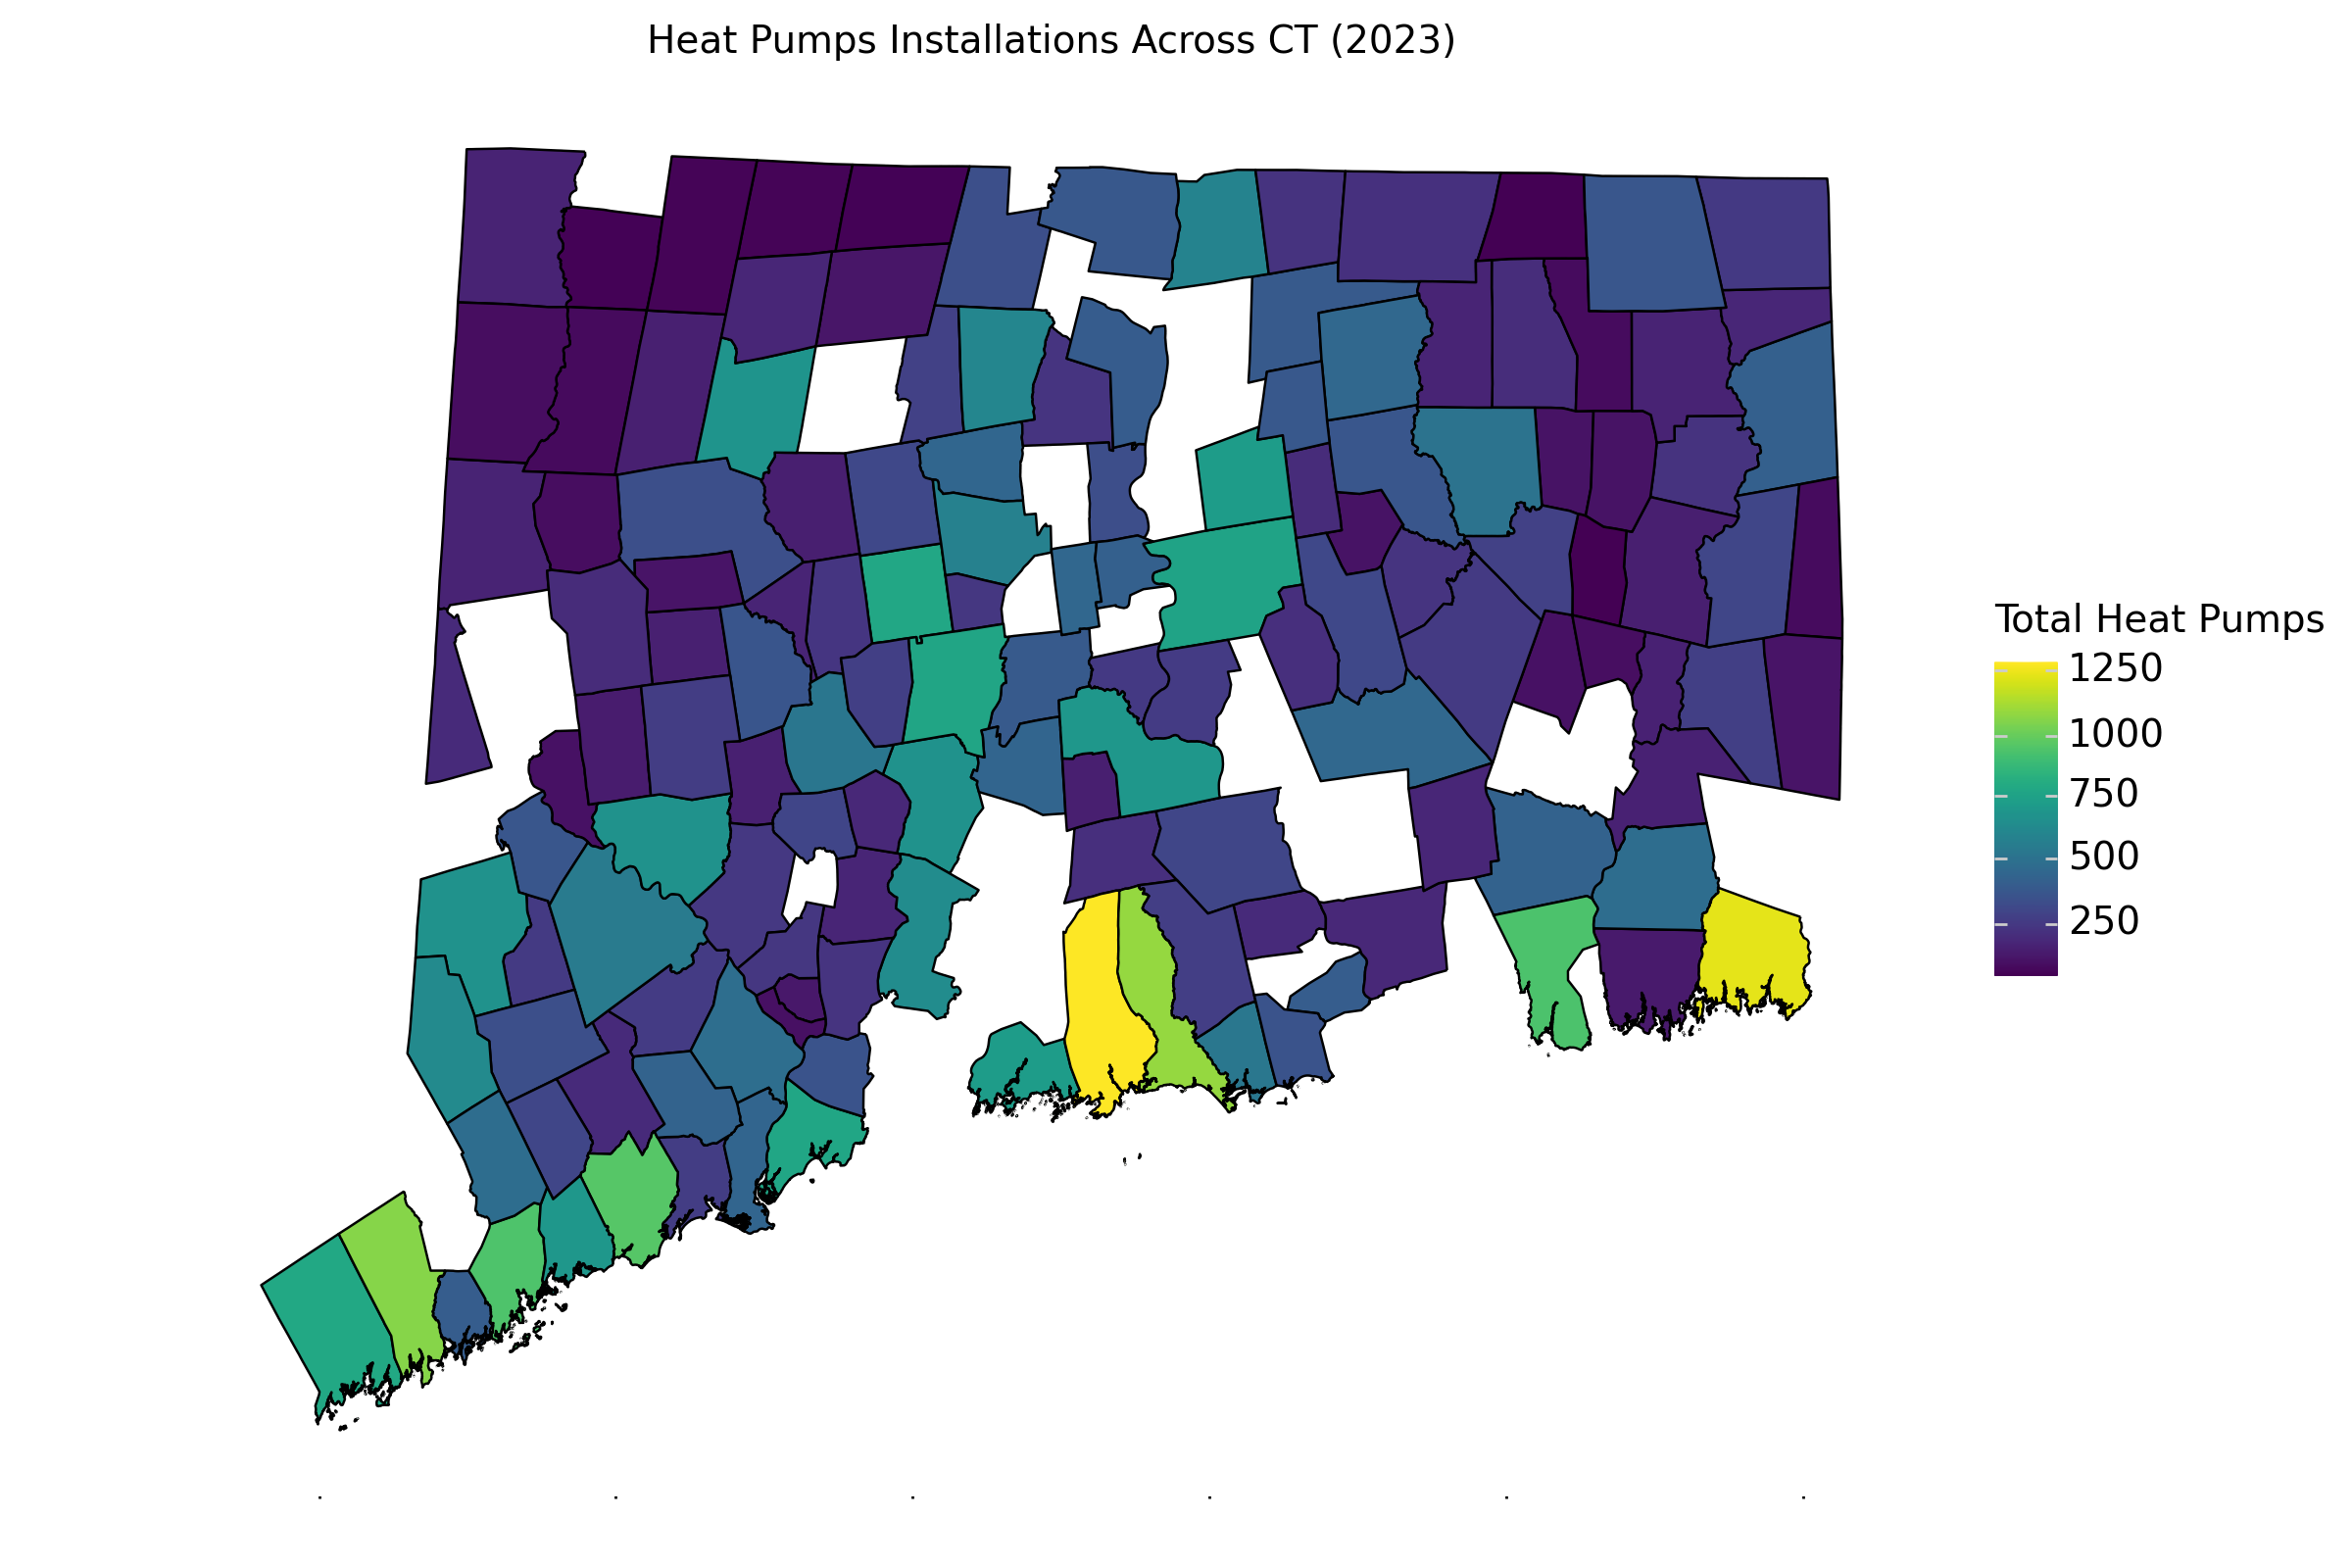

In [291]:
# create map of heat pumps across CT

plotnine.options.figure_size = (12, 8)


(ggplot()
  + geom_map(df, aes(geometry = 'geometry', fill='Total Heat Pumps'), color='black')
  + labs(fill='Total Heat Pumps')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 14))
  + ggtitle("Heat Pumps Installations Across CT (2023)")
 )

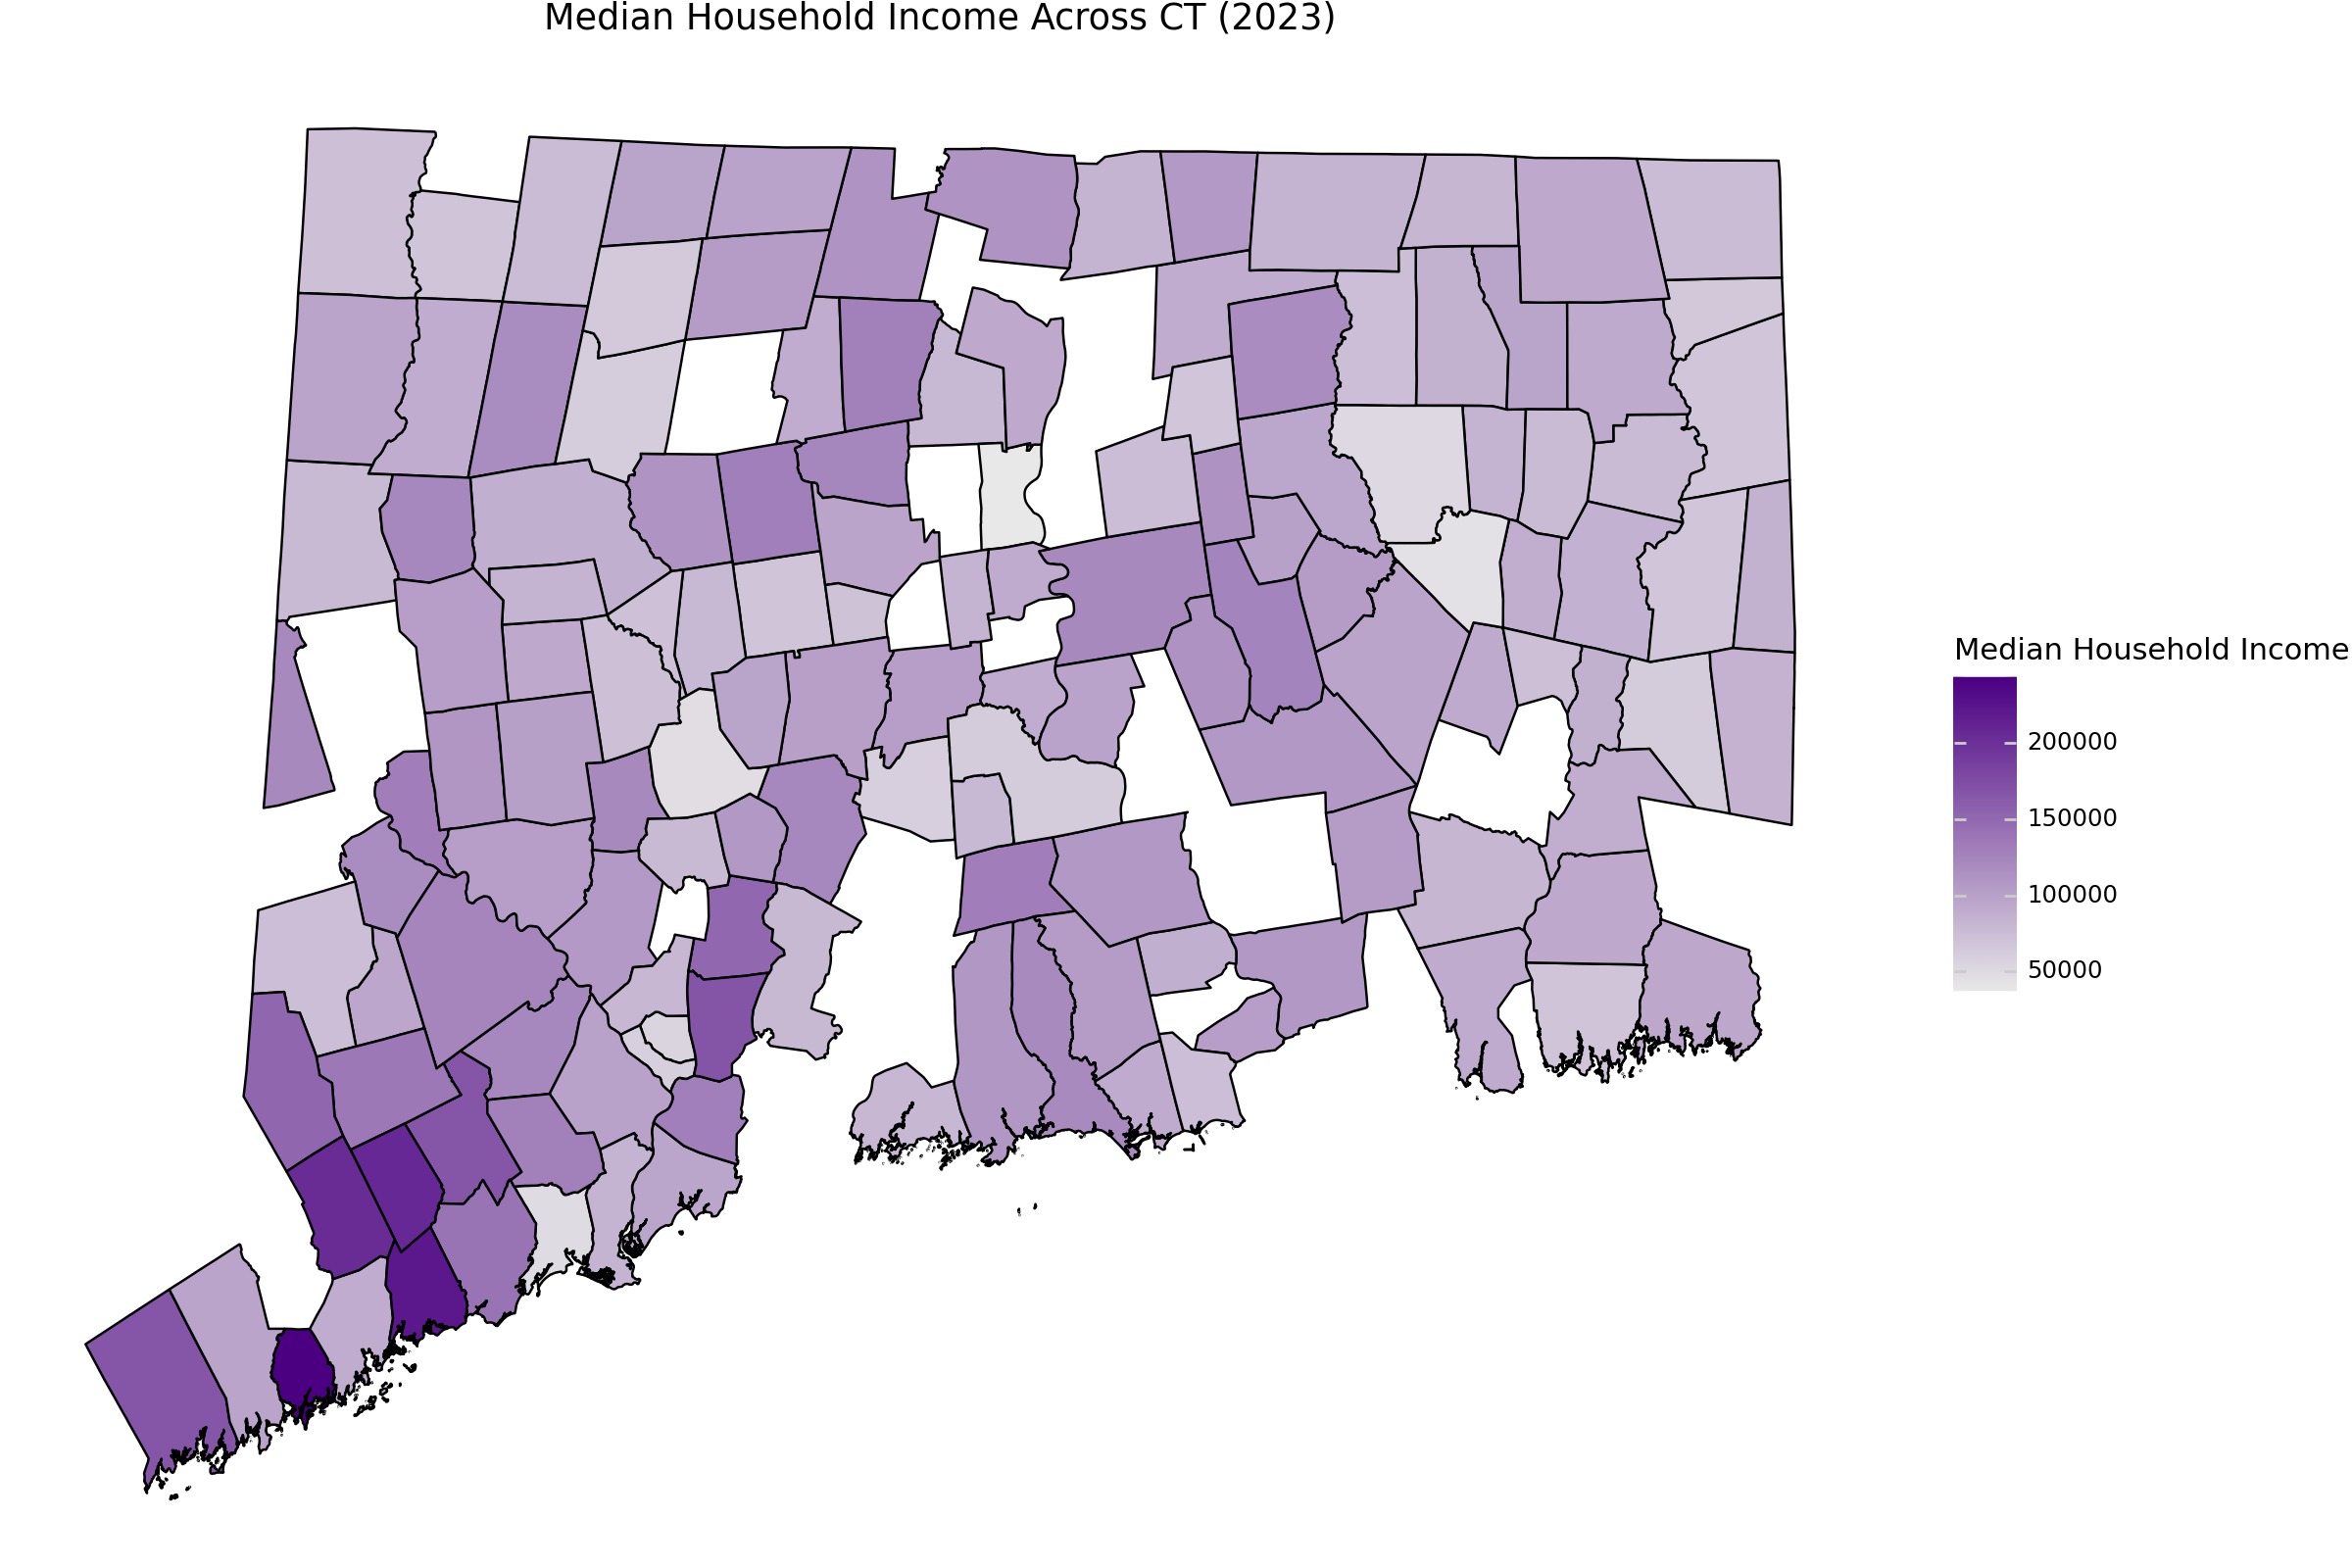

In [292]:
# create map of median household income across CT

plotnine.options.figure_size = (12, 8)


(ggplot()
  + geom_map(df, aes(geometry = 'geometry', fill='Median_Household_Income'), color='black')
  + labs(fill='Median Household Income')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 16))
  + ggtitle("Median Household Income Across CT (2023)")
  +theme_void()
  +scale_fill_gradient(
    name="Median Household Income",
    low="#E8E8E8",
    high="#4B0082",
    guide=guide_colorbar(direction="vertical")

))

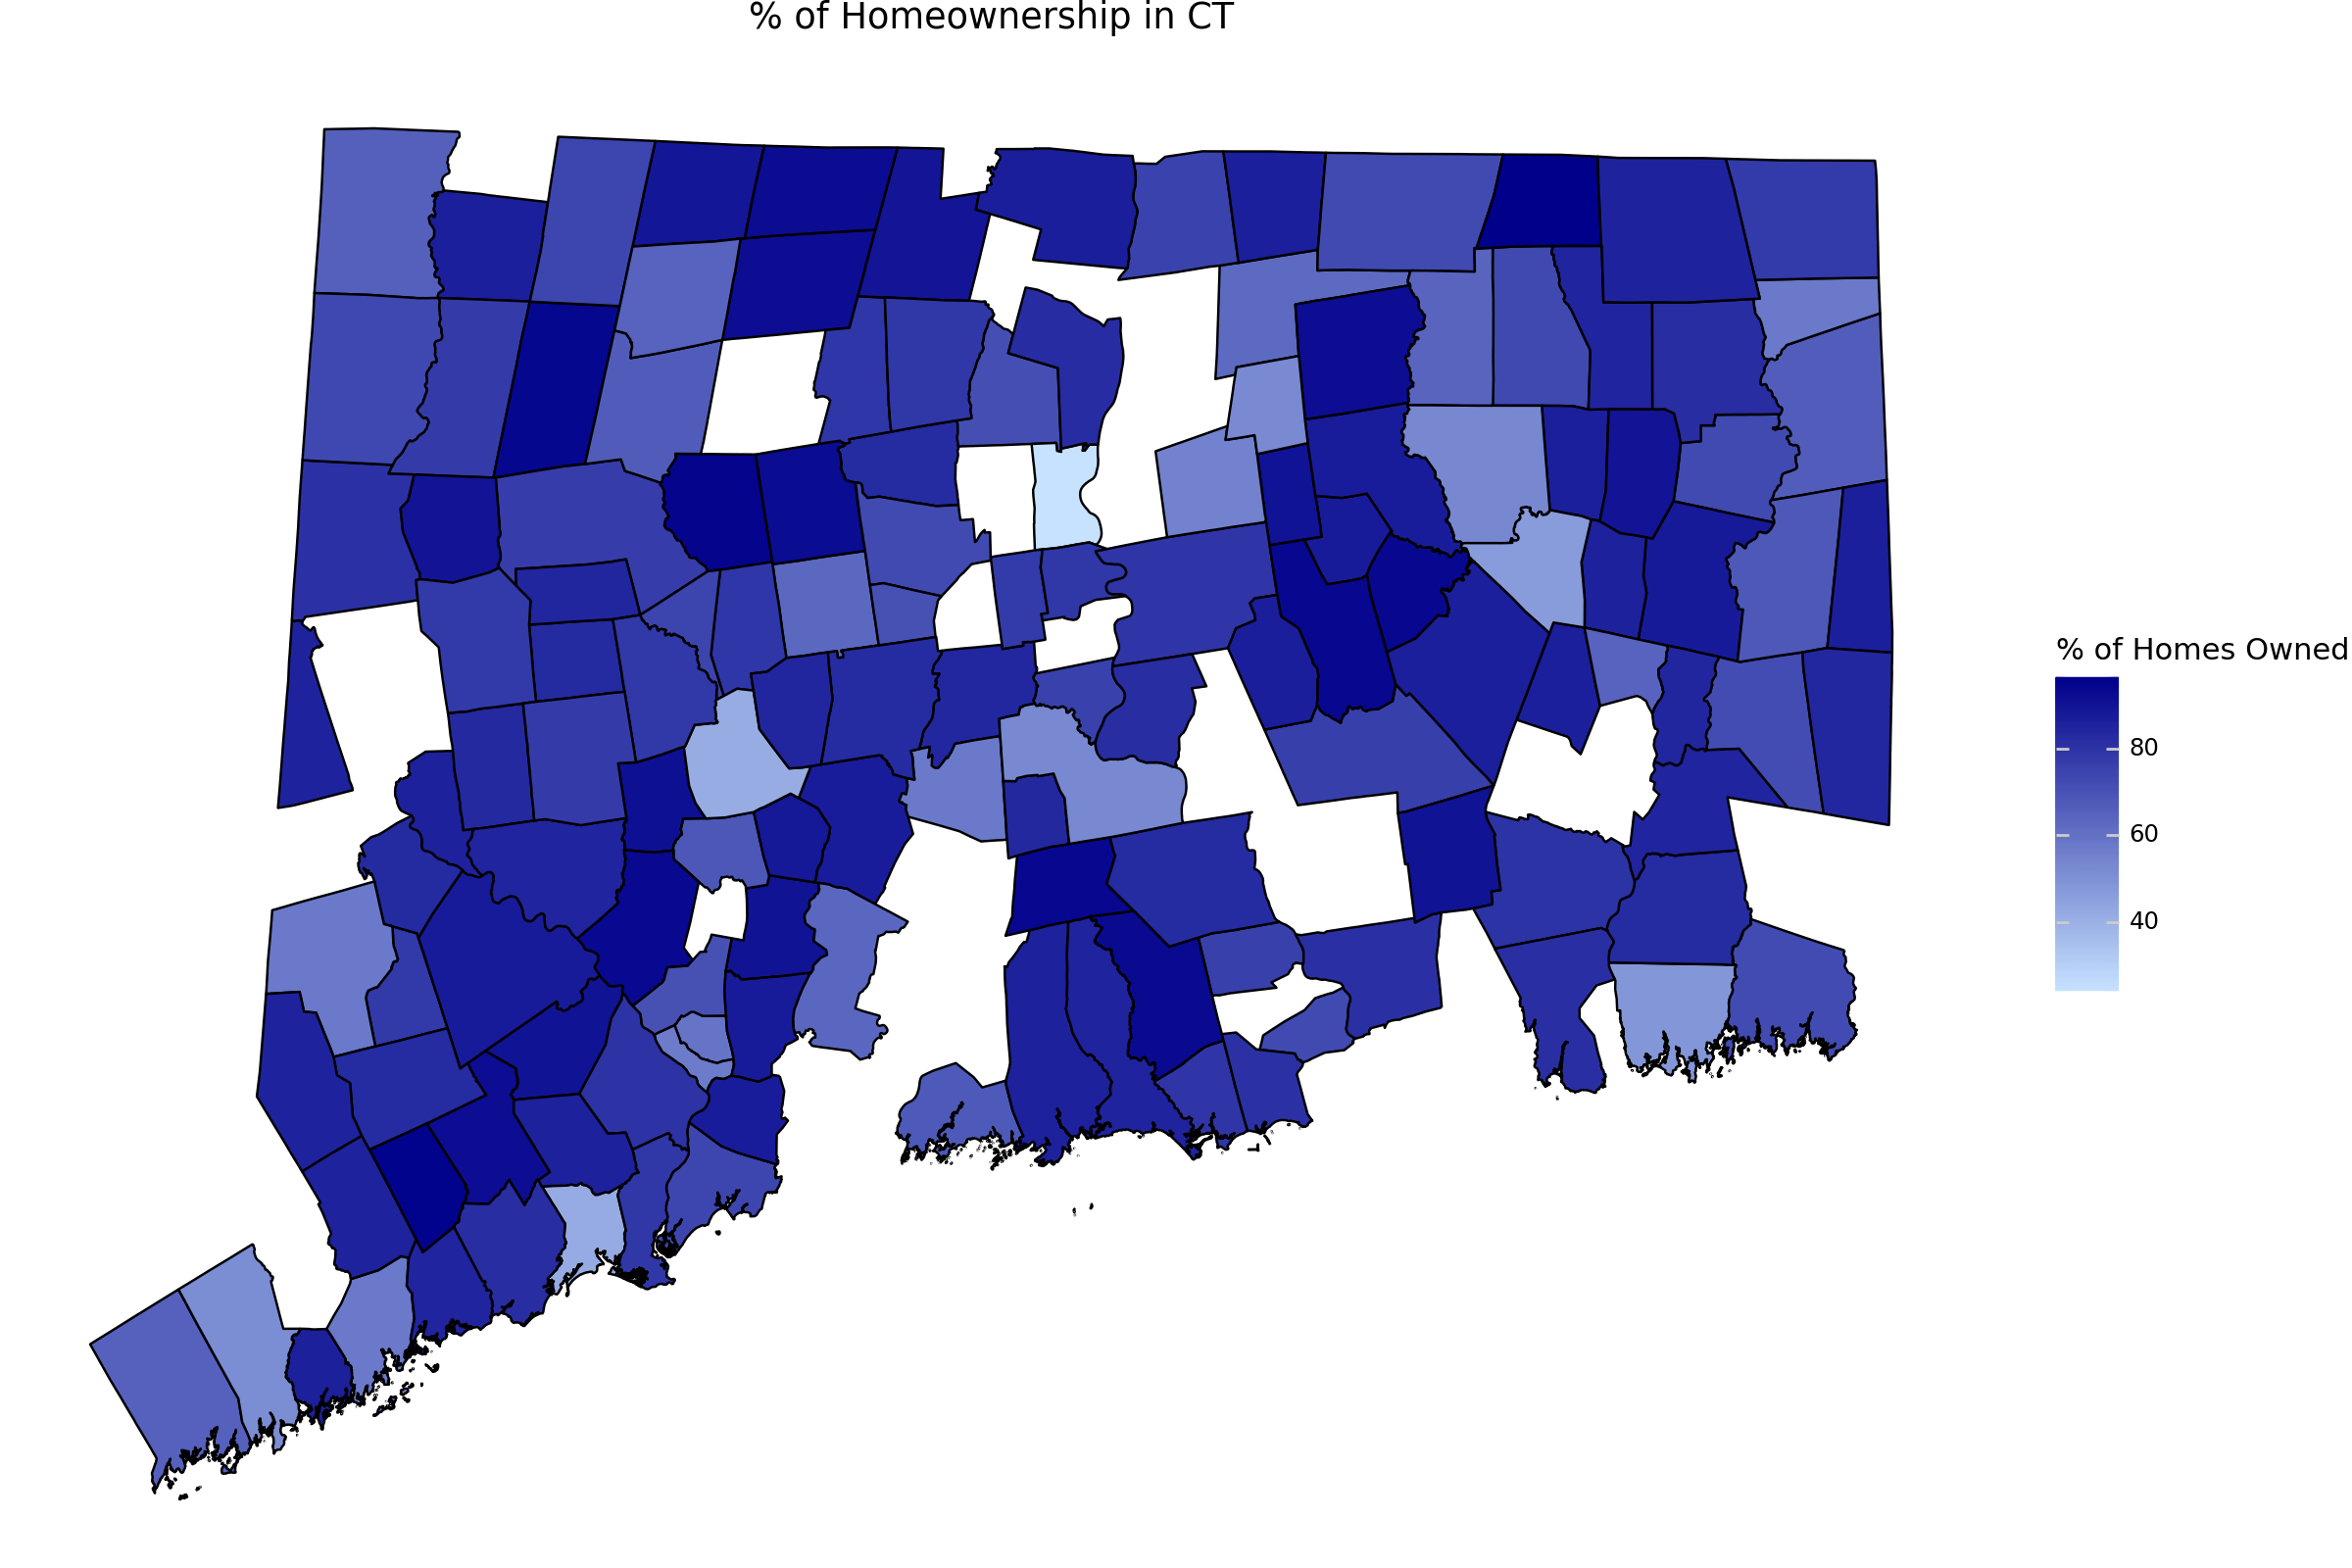

In [293]:
# create map of % of homeowners across CT

plotnine.options.figure_size = (12, 8)


(ggplot()
  + geom_map(df, aes(geometry = 'geometry', fill='Tenure_Owner_Occupied(%)'), color='black')
  + labs(fill='Tenure_Owner_Occupied(%)')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 18))
  + ggtitle("% of Homeownership in CT")
  +theme_void()
  +scale_fill_gradient(
    name="% of Homes Owned",
    low="#C6E2FF",
    high="#00008B",
    guide=guide_colorbar(direction="vertical")

))